In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Attacker Accuracy vs Global ellison

In [ ]:
data_dir = '/home/ubuntu/results/global_epsilon_VS_attacker_accuracy_(2023-02-01_23-45)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
plt.plot(data['global_epsilon'], data['attacker_accuracy'])

In [ ]:
data_dir = '/home/ubuntu/results/global_epsilon_VS_overhead_(2023-02-01_21-44)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
print(data.keys())
plt.plot(data['global_epsilon'], data['average_norm_distance'])

In [ ]:
def basic_composition(epsilon, k): 
  return epsilon*k
def advanced_composition(epsilon, delta, k): 
  return np.sqrt(2*k*np.log(1/(delta))) * epsilon + (k * epsilon)*(np.exp(epsilon)-1)

epsilons = np.linspace(0, 1, 100)
adv = [advanced_composition(epsilon, 0.1, 100) for epsilon in epsilons]
bsc = [basic_composition(epsilon, 100) for epsilon in epsilons]
plt.plot(epsilons, adv)
plt.plot(epsilons, bsc)

In [ ]:
data_dir = '/home/ubuntu/results/privacy_loss_vs_attacker_accuracy_(2023-03-03_01-52)/results.pkl'
plt.figure(dpi=300, figsize=(10,5))
data = pickle.load(open(data_dir, 'rb'))
acc = data['attacker_accuracy'][1:]
print(acc)
privacy_loss = data['privacy_loss'][1:]

plt.plot(privacy_loss,acc, label='DP-Shaping')

plt.plot([0, 50], [0.91, 0.91], 'r--', label='Without Shaping')
plt.plot([0, 50], [0.10, 0.10], 'g--', label='Constant-Rate ')
plt.xticks([0] + list(np.arange(10, 50+1, 10.0)))
plt.yticks([0] + list(np.arange(0.1, 1.0+0.1, 0.1)))
plt.xlabel('Privacy Loss')
plt.ylabel('Attacker Accuracy')
plt.legend()

[25.985706196344502]


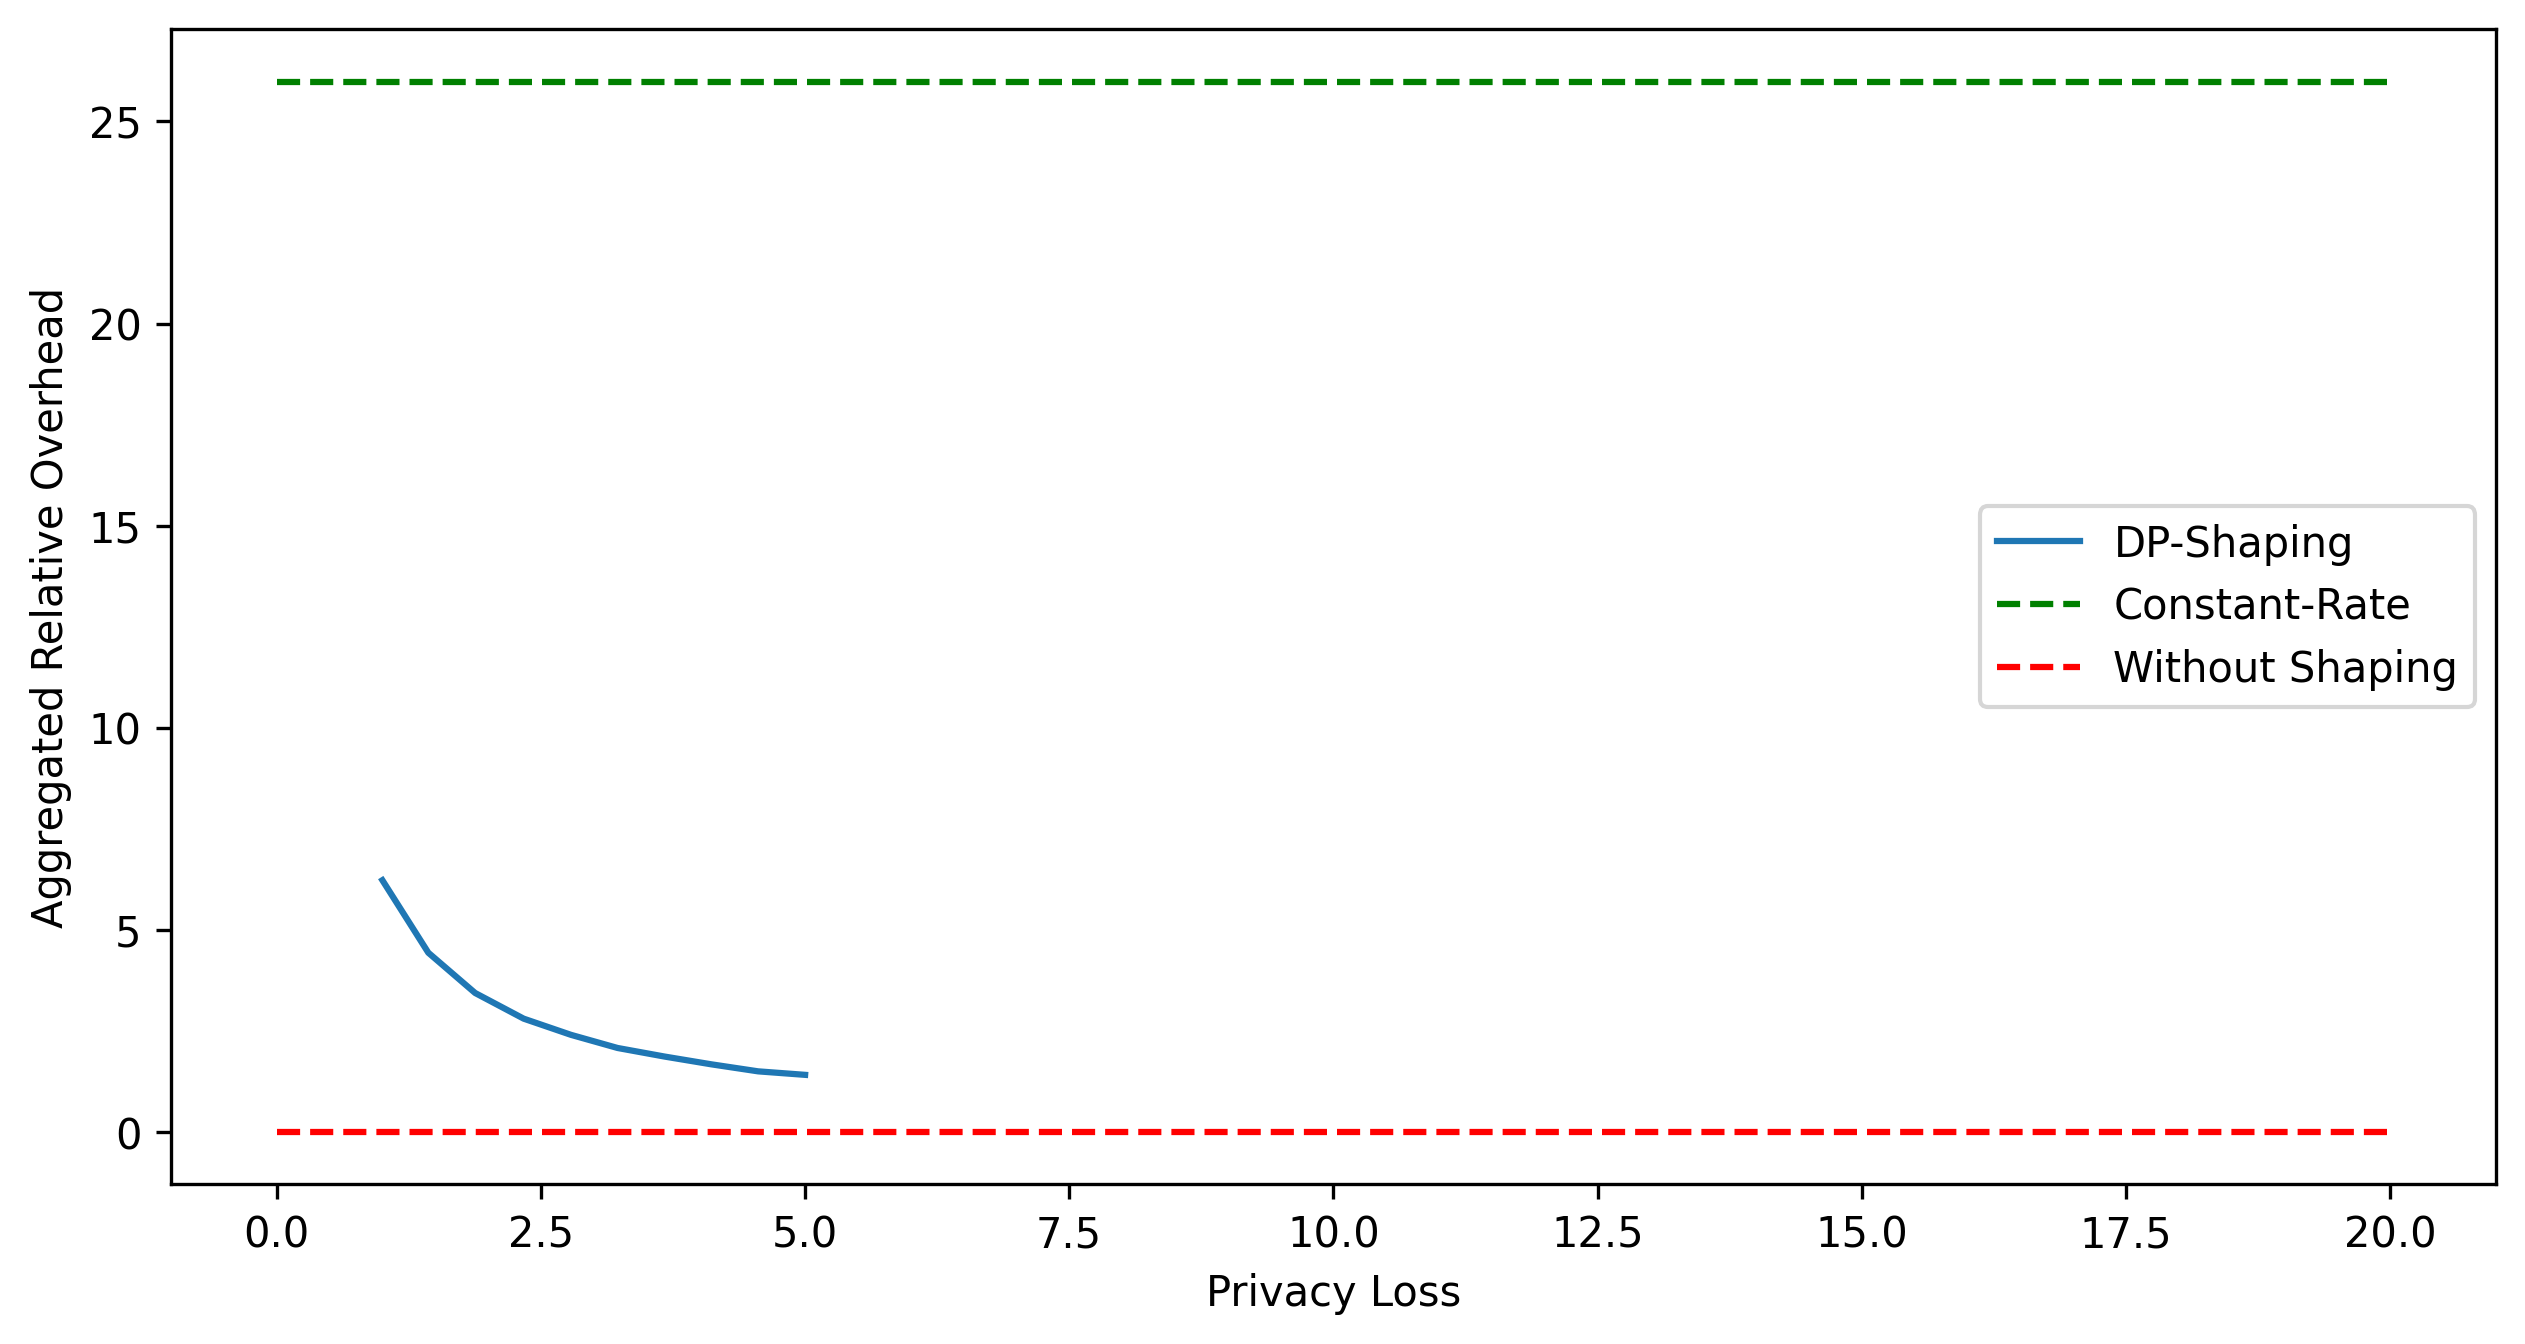

In [8]:
results_dir = '/home/ubuntu/results/privacy_loss_vs_overhead_(2023-04-03_00-12)/results.pkl'
baseline_results_dir = '/home/ubuntu/results/privacy_loss_vs_overhead_(2023-03-14_17-09)/baseline_results.pkl'

results = pickle.load(open(results_dir, 'rb'))
baseline_results = pickle.load(open(baseline_results_dir, 'rb'))


# print(data['average_aggregated_overhead'])
aao = results['average_aggregated_overhead']
ano = results['average_norm_distance']
awd = results['average_wasserstein_distance']
privacy_loss = results['privacy_loss']

baseline_aao = baseline_results['average_aggregated_overhead']
print(baseline_aao)
plt.figure(dpi=300, figsize=(10,5))
plt.plot(privacy_loss,aao, label='DP-Shaping')
plt.plot([0, 20], [baseline_aao, baseline_aao], 'g--', label='Constant-Rate')
plt.plot([0, 20], [0, 0], 'r--', label='Without Shaping')
# plt.xticks([0] + list(np.arange(10, 100+1, 10.0)))
# plt.yticks(list(np.arange(0, 23, 2)) + [24.88])
plt.xlabel('Privacy Loss')
plt.ylabel('Aggregated Relative Overhead')
plt.legend()

In [ ]:
data_dir = '/home/ubuntu/results/privacy_loss_VS_overhead_(2023-02-27_22-43)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
print(data['average_aggregated_overhead'])
aao = data['average_aggregated_overhead']
ano = data['average_norm_distance']
awd = data['average_wasserstein_distance']
privacy_loss = data['privacy_loss']
plt.figure(dpi=300, figsize=(10,5))
plt.plot(privacy_loss,awd, label='DP-Shaping')
plt.plot([0, 100], [39.89, 39.89], 'g--', label='Constant-Rate')
plt.plot([0, 100], [0, 0], 'r--', label='Without Shaping')
plt.xticks([0] + list(np.arange(10, 100+1, 10.0)))
plt.yticks(list(np.arange(0, 39, 3)) + [39.89])
plt.xlim(0, 100)
plt.xlabel('Privacy Loss')
plt.ylabel('wasserstein distance')
plt.legend()

## BandB VS TCN (No shaping)

dict_keys(['classes_num', 'TCN_accuracy', 'TCN_precision', 'TCN_recall', 'BandB_accuracy', 'BandB_precision', 'BandB_recall'])
BandB acc:  [1.         0.85125    0.80166667 0.6175    ]
BandB recall:  [1.        0.85      0.815     0.6334375]
BandB precision:  [1.         0.78074467 0.73137697 0.49252731]
TCN acc:  [0.9975   1.       0.995    0.995625]
TCN recall:  [0.99722222 1.         0.99507734 0.99540504]
TCN precision:  [0.99736842 1.         0.99515695 0.99550545]
[0.9975   1.       0.995    0.995625]
[10, 20, 30, 40]


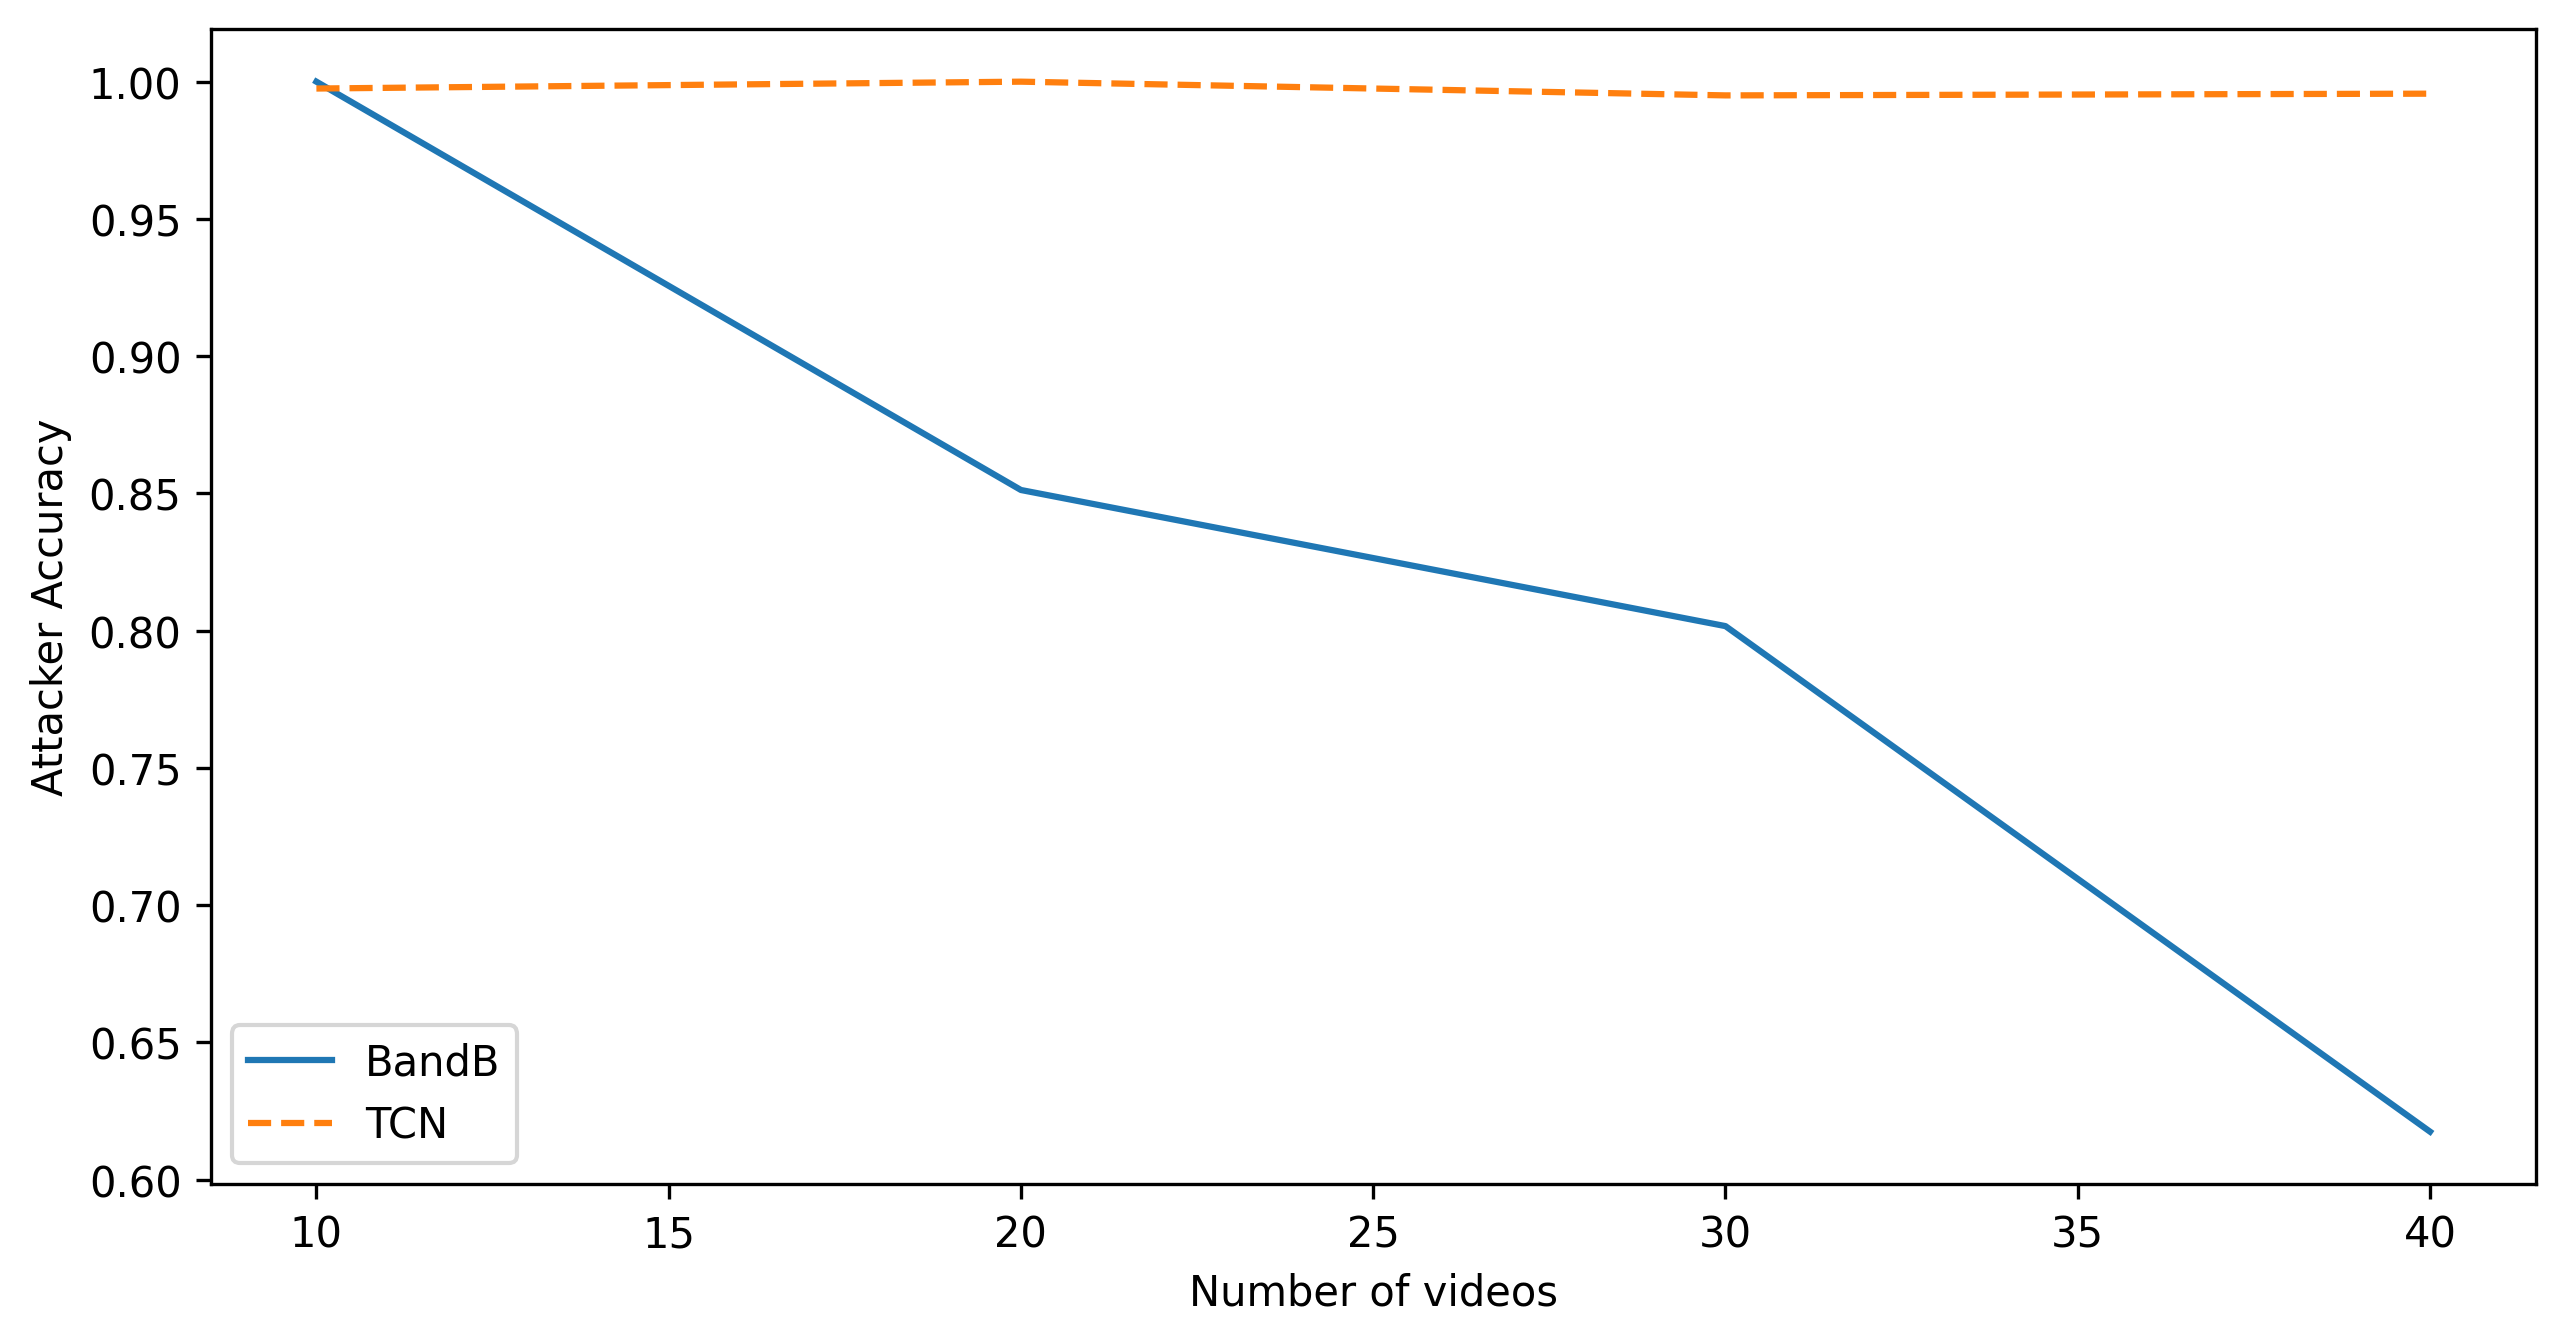

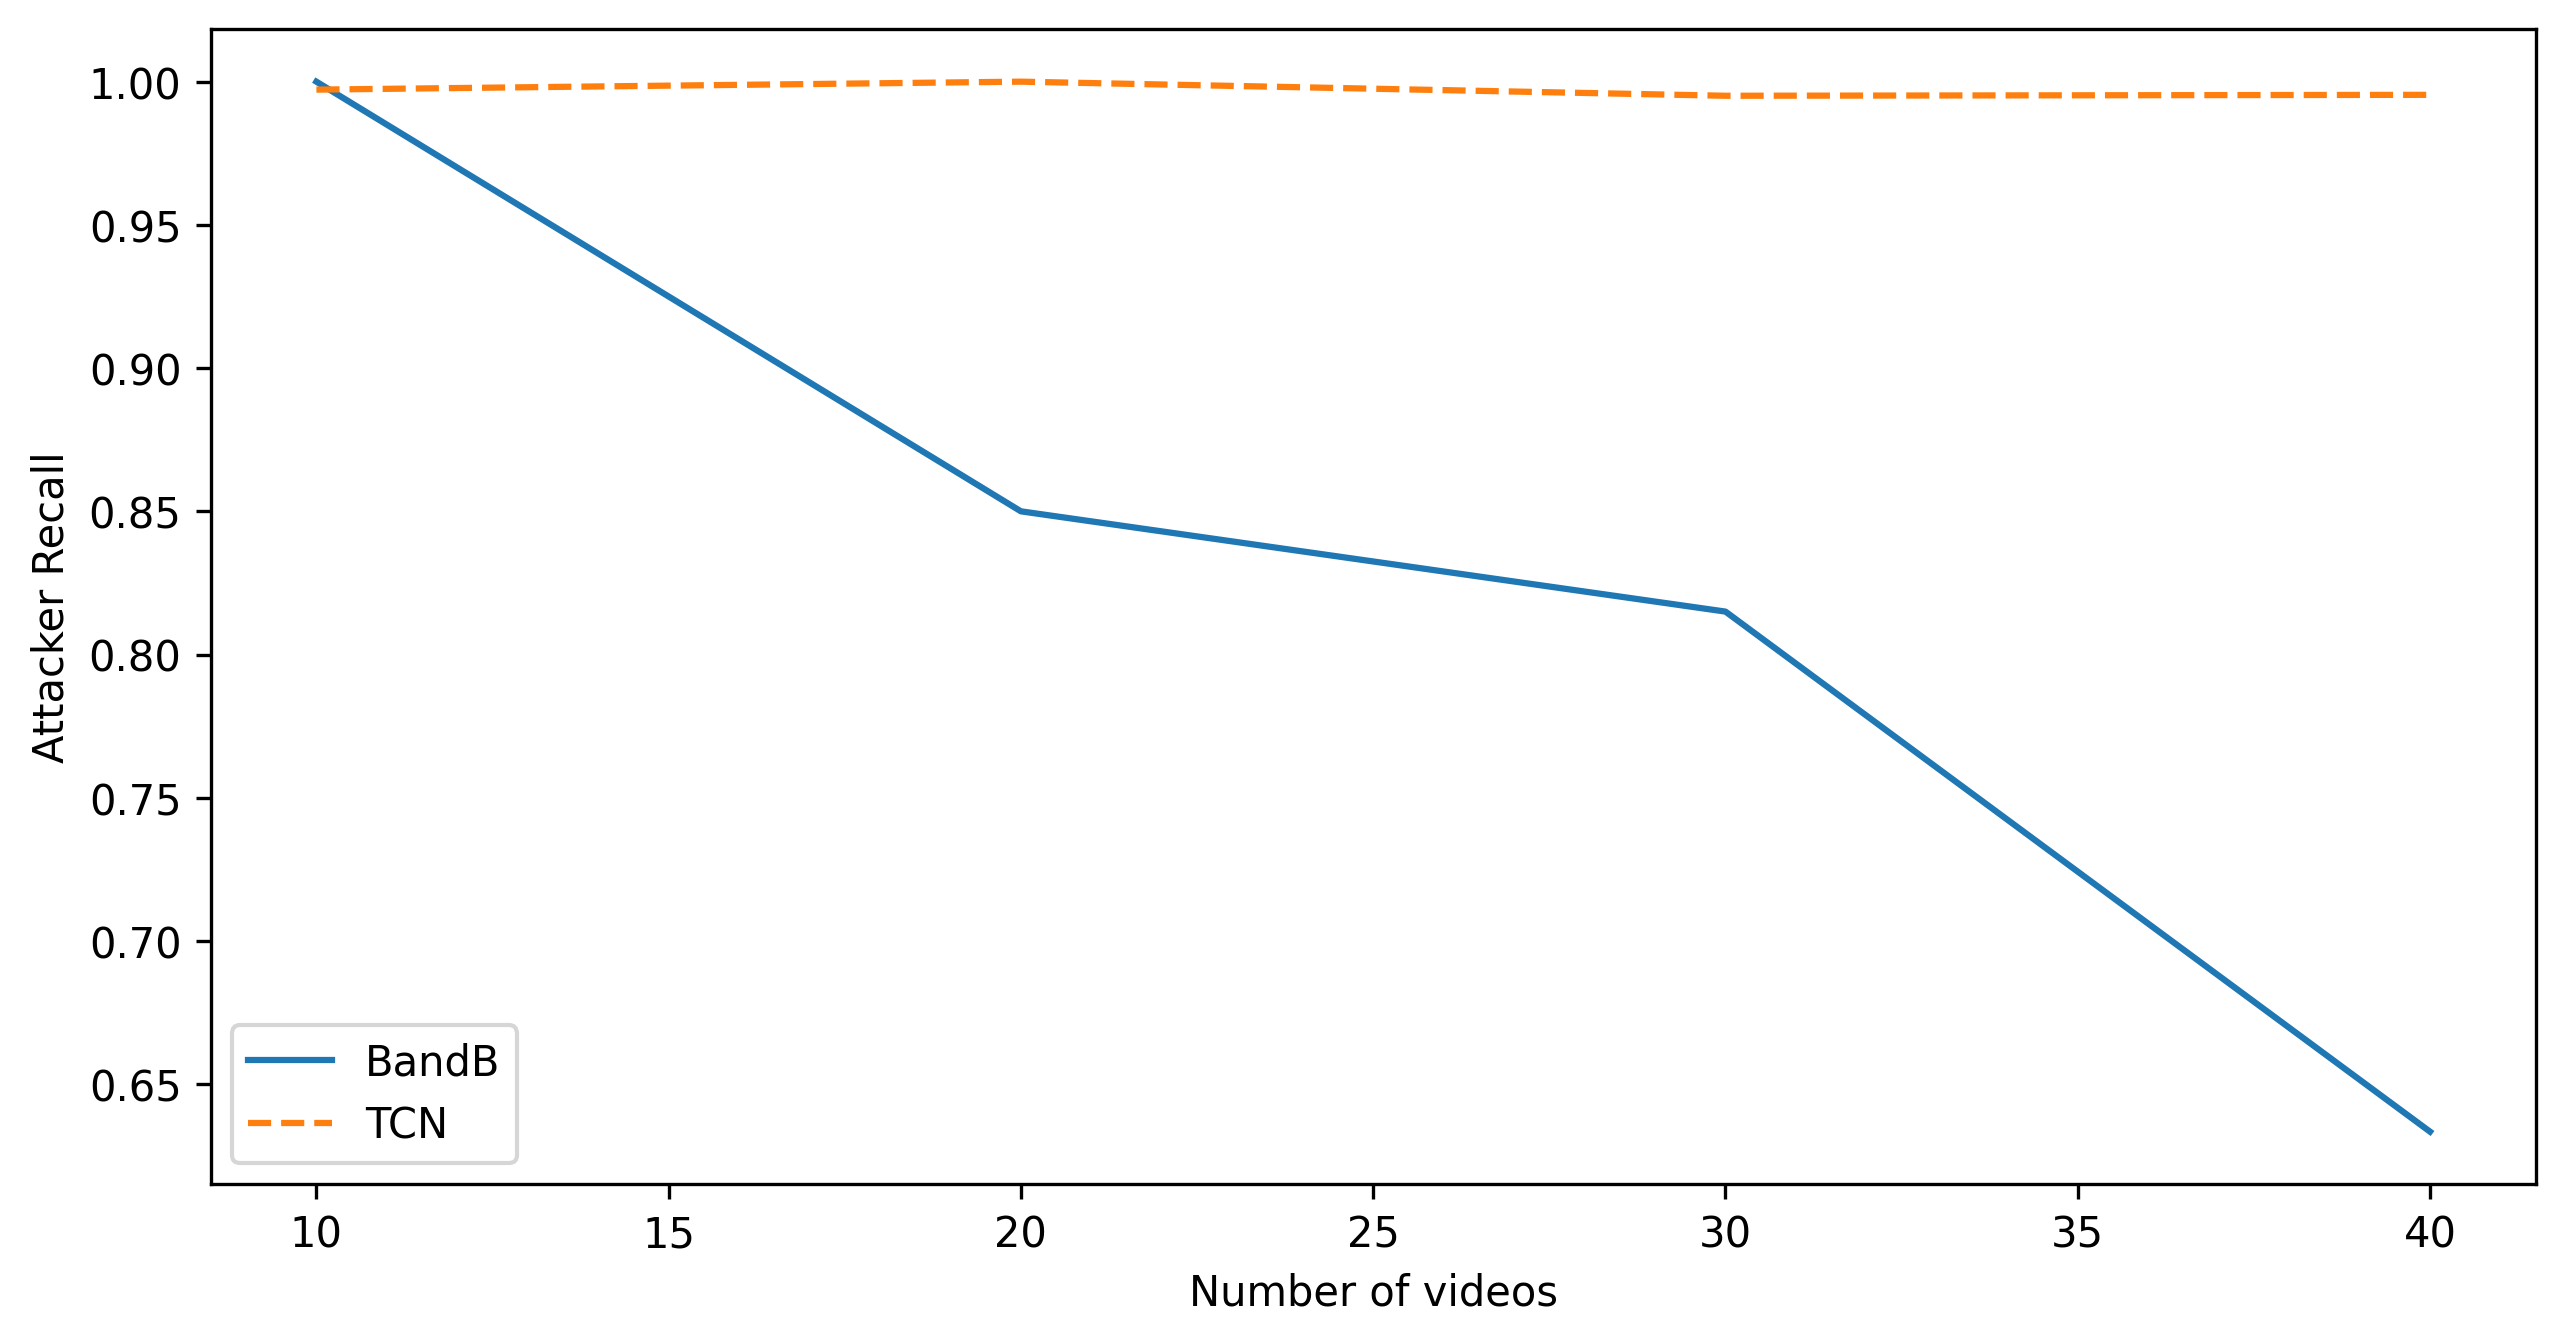

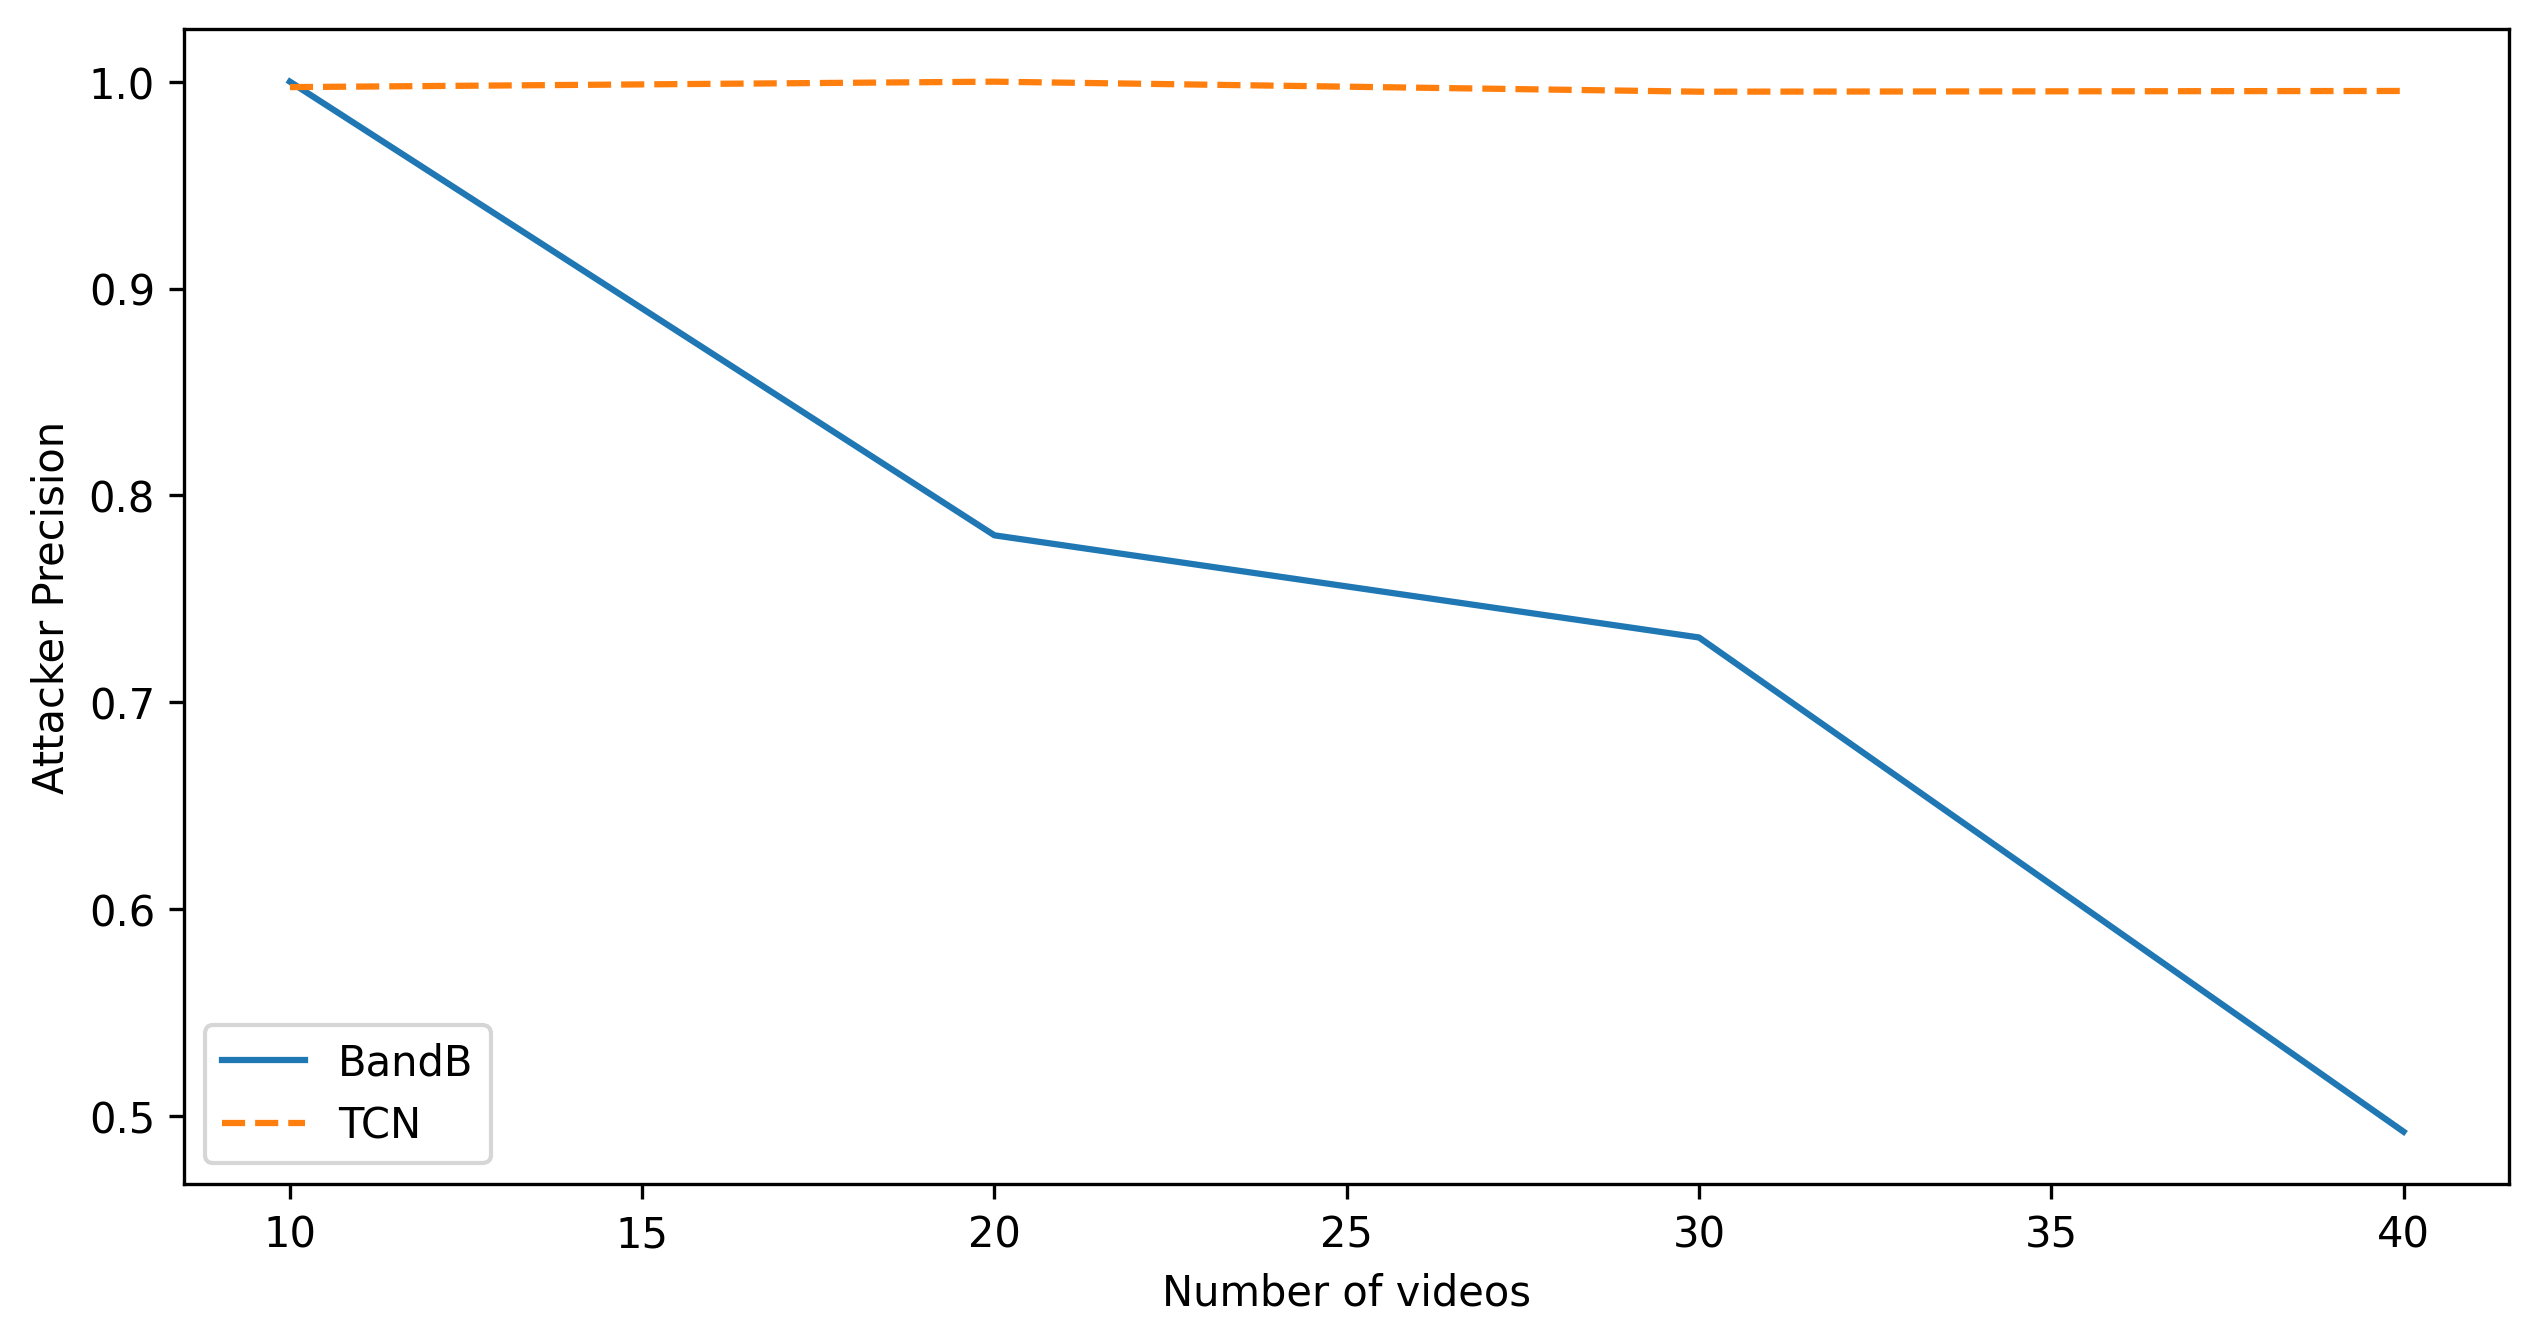

In [14]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-04-26_04-18)/baseline_results.pkl'
data = pickle.load(open(data_dir, 'rb'))
print(data.keys())
BandB_acc = data['BandB_accuracy']
BandB_acc_avg = np.mean(BandB_acc, axis=1)
BandB_recall_avg = np.mean(data['BandB_recall'], axis=1)
BandB_precision_avg = np.mean(data['BandB_precision'], axis=1)
print("BandB acc: ", BandB_acc_avg)
print("BandB recall: ", BandB_recall_avg)
print("BandB precision: ", BandB_precision_avg)
BandB_acc_std = np.std(BandB_acc, axis=1)
TCN_acc = data['TCN_accuracy']
TCN_acc_avg = np.mean(TCN_acc, axis=1)
TCN_recall_avg = np.mean(data['TCN_recall'], axis=1)
TCN_precision_avg = np.mean(data['TCN_precision'], axis=1)
print("TCN acc: ", TCN_acc_avg)
print("TCN recall: ", TCN_recall_avg)
print("TCN precision: ", TCN_precision_avg)
print(TCN_acc_avg)
TCN_acc_std = np.std(TCN_acc, axis=1)
class_num = data['classes_num']
print(class_num)
plt.figure(dpi=300, figsize=(10,5))
plt.plot(class_num, BandB_acc_avg,label='BandB')
plt.plot(class_num, TCN_acc_avg, '--', label='TCN')
plt.xlabel('Number of videos')
plt.ylabel('Attacker Accuracy')
plt.legend()

plt.figure(dpi=300, figsize=(10,5))
plt.plot(class_num, BandB_recall_avg,label='BandB')
plt.plot(class_num, TCN_recall_avg, '--', label='TCN')
plt.xlabel('Number of videos')
plt.ylabel('Attacker Recall')
plt.legend()

plt.figure(dpi=300, figsize=(10,5))
plt.plot(class_num, BandB_precision_avg,label='BandB')
plt.plot(class_num, TCN_precision_avg, '--', label='TCN')
plt.xlabel('Number of videos')
plt.ylabel('Attacker Precision')
plt.legend()

## BandB VS TCN (Shaping)

In [ ]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-03-07_22-07)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
BandB_acc = data['BandB_accuracy']
TCN_acc = data['TCN_accuracy']
privacy_loss = data['privacy_loss']
plt.figure(dpi=100, figsize=(10,5))
plt.plot(privacy_loss, BandB_acc,label='BandB')
plt.plot(privacy_loss, TCN_acc, '--', label='TCN')
plt.xlabel('Privacy Loss')
plt.ylabel('Attacker Accuracy')
plt.legend()

## BandB VS TCN (Shaping) mean-var

In [ ]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-03-21_15-48)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))


privacy_loss = data['privacy_loss']

TCN_acc = data['TCN_accuracy']
print(TCN_acc)
# TCN_min_acc = np.min(TCN_acc, axis=1)
# TCN_max_acc = np.max(TCN_acc, axis=1)
TCN_avg_acc = np.mean(TCN_acc, axis=1)
TCN_std_acc = np.std(TCN_acc, axis=1)

fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
ax.plot(privacy_loss, TCN_avg_acc,label='BandB_avg')
ax.fill_between(privacy_loss, TCN_avg_acc - TCN_std_acc, TCN_avg_acc + TCN_std_acc, alpha=0.2)
ax.set_xlabel("Privacy Loss")
ax.set_ylabel("Attacker Test Accuracy")
ax.set_title("TCN model")

# fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
# ax.plot(privacy_loss, BandB_avg_acc,label='BandB_avg')
# ax.fill_between(privacy_loss, BandB_avg_acc - BandB_std_acc, BandB_avg_acc + BandB_std_acc, alpha=0.2)
# ax.set_xlabel("Privacy Loss")
# ax.set_ylabel("Attacker Test Accuracy")
# ax.set_title("BandB model")





# privacy_loss = data['privacy_loss']
# plt.figure(dpi=100, figsize=(10,5))
# plt.plot(privacy_loss, BandB_avg_acc,label='BandB_avg')
# plt.plot(privacy_loss, BandB_max_acc,label='BandB_max')
# plt.plot(privacy_loss, BandB_min_acc,label='BandB_min')
# plt.plot(privacy_loss, TCN_acc, '--', label='TCN')
# plt.xlabel('Privacy Loss')
# plt.ylabel('Attacker Accuracy')
# plt.legend()

## Data Analysis

### Overhead

In [2]:
results_dir = "/home/minesvpn/results/data_analysis/overhead_(2023-04-19_12-29)/results.pkl"
results = pickle.load(open(results_dir, 'rb'))
for index, noise_multiplier in enumerate(results['peer2_noise_multiplier']):
    print(noise_multiplier, results['aggregated_overhead'][index], results['peer2_DP_interval_length_us'][index])
print(results)

16 8.954084178350637 1000000
48 18.939938448717704 1000000
1 0.613463591955716 1000000
4 2.2736933562683825 1000000
32 15.488313416548088 1000000
8 4.504047708942056 1000000
24 12.68673747499694 1000000
2 1.167899721264349 1000000
40 17.46529448861298 1000000
{'peer1_noise_multiplier': [12, 12, 12, 12, 12, 12, 12, 12, 12], 'peer2_noise_multiplier': [16, 48, 1, 4, 32, 8, 24, 2, 40], 'peer1_privacy_loss': [(296.05170185988095, 1.2), (296.05170185988095, 1.2), (296.05170185988095, 1.2), (296.05170185988095, 1.2), (296.05170185988095, 1.2), (296.05170185988095, 1.2), (296.05170185988095, 1.2), (296.05170185988095, 1.2), (296.05170185988095, 1.2)], 'peer2_privacy_loss': [(5.232272592994045, 5.0), (1.6138825309980152, 13.0), (225.70113457325394, 1.3), (27.96034037197618, 2.0), (2.4695768073704025, 8.9), (11.63642018598809, 3.0), (3.3579496393179973, 6.9), (74.67068074395236, 1.5), (1.9522124113107255, 10.9)], 'aggregated_overhead': [8.954084178350637, 18.939938448717704, 0.613463591955716, 2

## Latency


In [12]:
results_dir = "/home/minesvpn/results/data_analysis/latency_(2023-04-26_12-24)/results.pkl"
results = pickle.load(open(results_dir, 'rb'))
print(results.keys())
print(results['peer1_sensitivity'])
for index, noise_multiplier in enumerate(results['peer1_sensitivity']):
    if(results['peer1_sensitivity'][index] == 201 and results["peer2_noise_multiplier"][index] == 12):
        print("peer2_DP_interval_length_us", results['peer2_DP_interval_length_us'][index])
        print("Average Latency", results['latencies_average_us'][index])
        print("Std Latency", results['latencies_std_us'][index])
        print("------------------")
print("*****************************")       
for index, noise_multiplier in enumerate(results['peer1_sensitivity']):
    if(results['peer1_sensitivity'][index] == 200 and results["peer2_noise_multiplier"][index] == 12):
        print("peer2_DP_interval_length_us", results['peer2_DP_interval_length_us'][index])
        print("Average Latency", results['latencies_average_us'][index])
        print("Std Latency", results['latencies_std_us'][index])
        print("------------------")

dict_keys(['peer1_noise_multiplier', 'peer2_noise_multiplier', 'peer1_DP_interval_length_us', 'peer2_DP_interval_length_us', 'peer1_aggregated_privacy_loss', 'peer2_aggregated_privacy_loss', 'peer1_per_query_privacy_loss', 'peer2_per_query_privacy_loss', 'peer1_send_interval_length_us', 'peer2_send_interval_length_us', 'peer1_max_dp_decision', 'peer1_min_dp_decision', 'peer2_max_dp_decision', 'peer2_min_dp_decision', 'latencies_average_us', 'latencies_std_us', 'latencies_95percentile_us', 'peer1_sensitivity', 'peer2_sensitivity'])
[200, 200, 200, 200, 201, 200, 200, 200, 200, 200, 200, 200, 200, 200, 201, 201, 200, 200, 200, 200, 200, 200, 200, 200, 201, 201, 200, 200]
peer2_DP_interval_length_us 500000
Average Latency 1709852.1647087408
Std Latency 1305905.8797423756
------------------
peer2_DP_interval_length_us 1500000
Average Latency 3761461.7831873945
Std Latency 2903762.9874232723
------------------
peer2_DP_interval_length_us 50000
Average Latency 179693.51900118537
Std Latency 

### Privacy

In [3]:
results_dir = "/home/minesvpn/results/data_analysis/privacy_(2023-04-11_01-05)/results.pkl"
results = pickle.load(open(results_dir, 'rb'))
baseline_results = pickle.load(open(baseline_results_dir, 'rb'))

# unshaped_TCN_accuracy = results['unshaped_TCN_accuracy']
# unshaped_TCN_precision = results['unshaped_TCN_precision']
# unshaped_TCN_recall = results['unshaped_TCN_recall']

# unshaped_BandB_accuracy = results['unshaped_BandB_accuracy']
# unshaped_BandB_precision = results['unshaped_BandB_precision']
# unshaped_BandB_recall = results['unshaped_BandB_recall']


print(results)
print(baseline_results)

{'noise_multiplier': [25], 'privacy_loss': [(4.685259175449132, 5.4)], 'TCN_accuracy_shaped': [[tensor(0.0500), tensor(0.1500), tensor(0.1000), tensor(0.1000), tensor(0.0500)]], 'TCN_precision_shaped': [[0, 0, 0, 0, 0]], 'TCN_recall_shaped': [[0, 0, 0, 0, 0]], 'BandB_accuracy_shaped': [[0.05, 0.0, 0.1, 0.0, 0.05]], 'BandB_precision_shaped': [[0.005555555555555556, 0.0, 0.01, 0.0, 0.005555555555555556]], 'BandB_recall_shaped': [[0.1111111111111111, 0.0, 0.1, 0.0, 0.1111111111111111]], 'TCN_accuracy_unshaped': [[tensor(0.6500), tensor(0.7500), tensor(0.7500), tensor(0.6500), tensor(1.)]], 'TCN_precision_unshaped': [[0, 0, 0, 0, 0]], 'TCN_recall_unshaped': [[0, 0, 0, 0, 0]], 'BandB_accuracy_unshaped': [[0.0, 0.05, 0.65, 0.0, 0.05]], 'BandB_precision_unshaped': [[0.0, 0.005555555555555556, 0.44000000000000006, 0.0, 0.005]], 'BandB_recall_unshaped': [[0.0, 0.1111111111111111, 0.6, 0.0, 0.1]], 'DP_interval_length_us': [500000], 'send_interval_length_us': [50000]}


## Tmp for report 1s


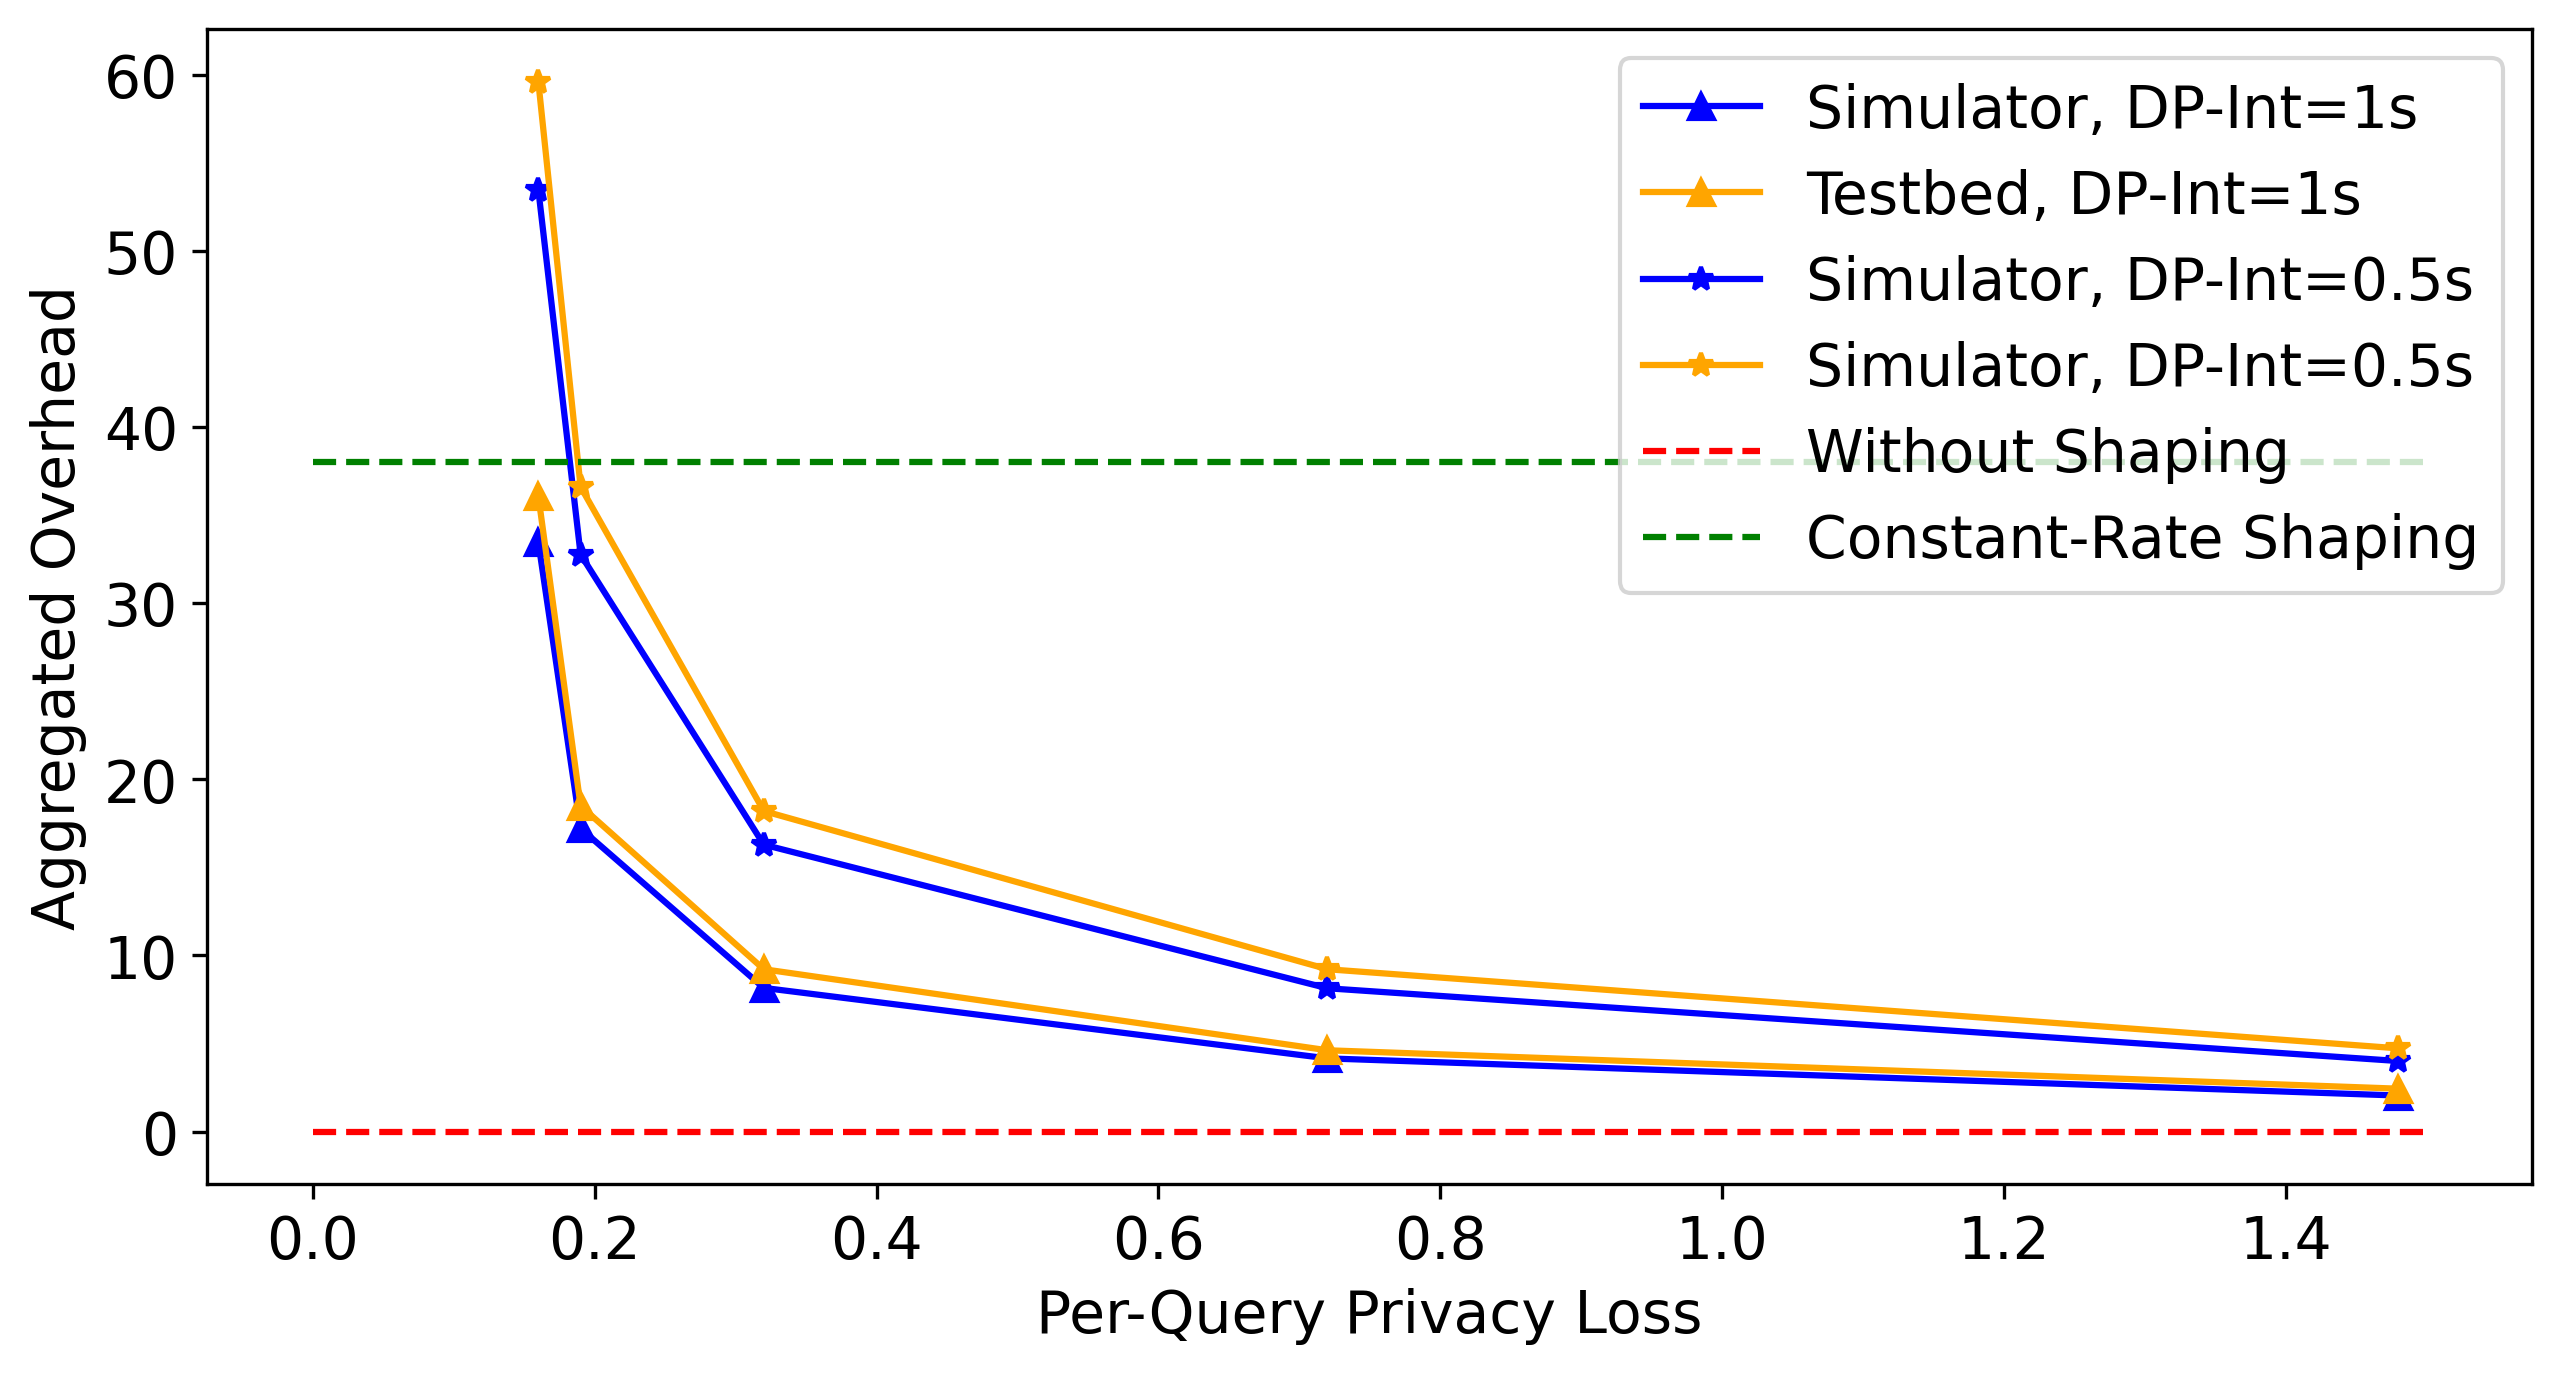

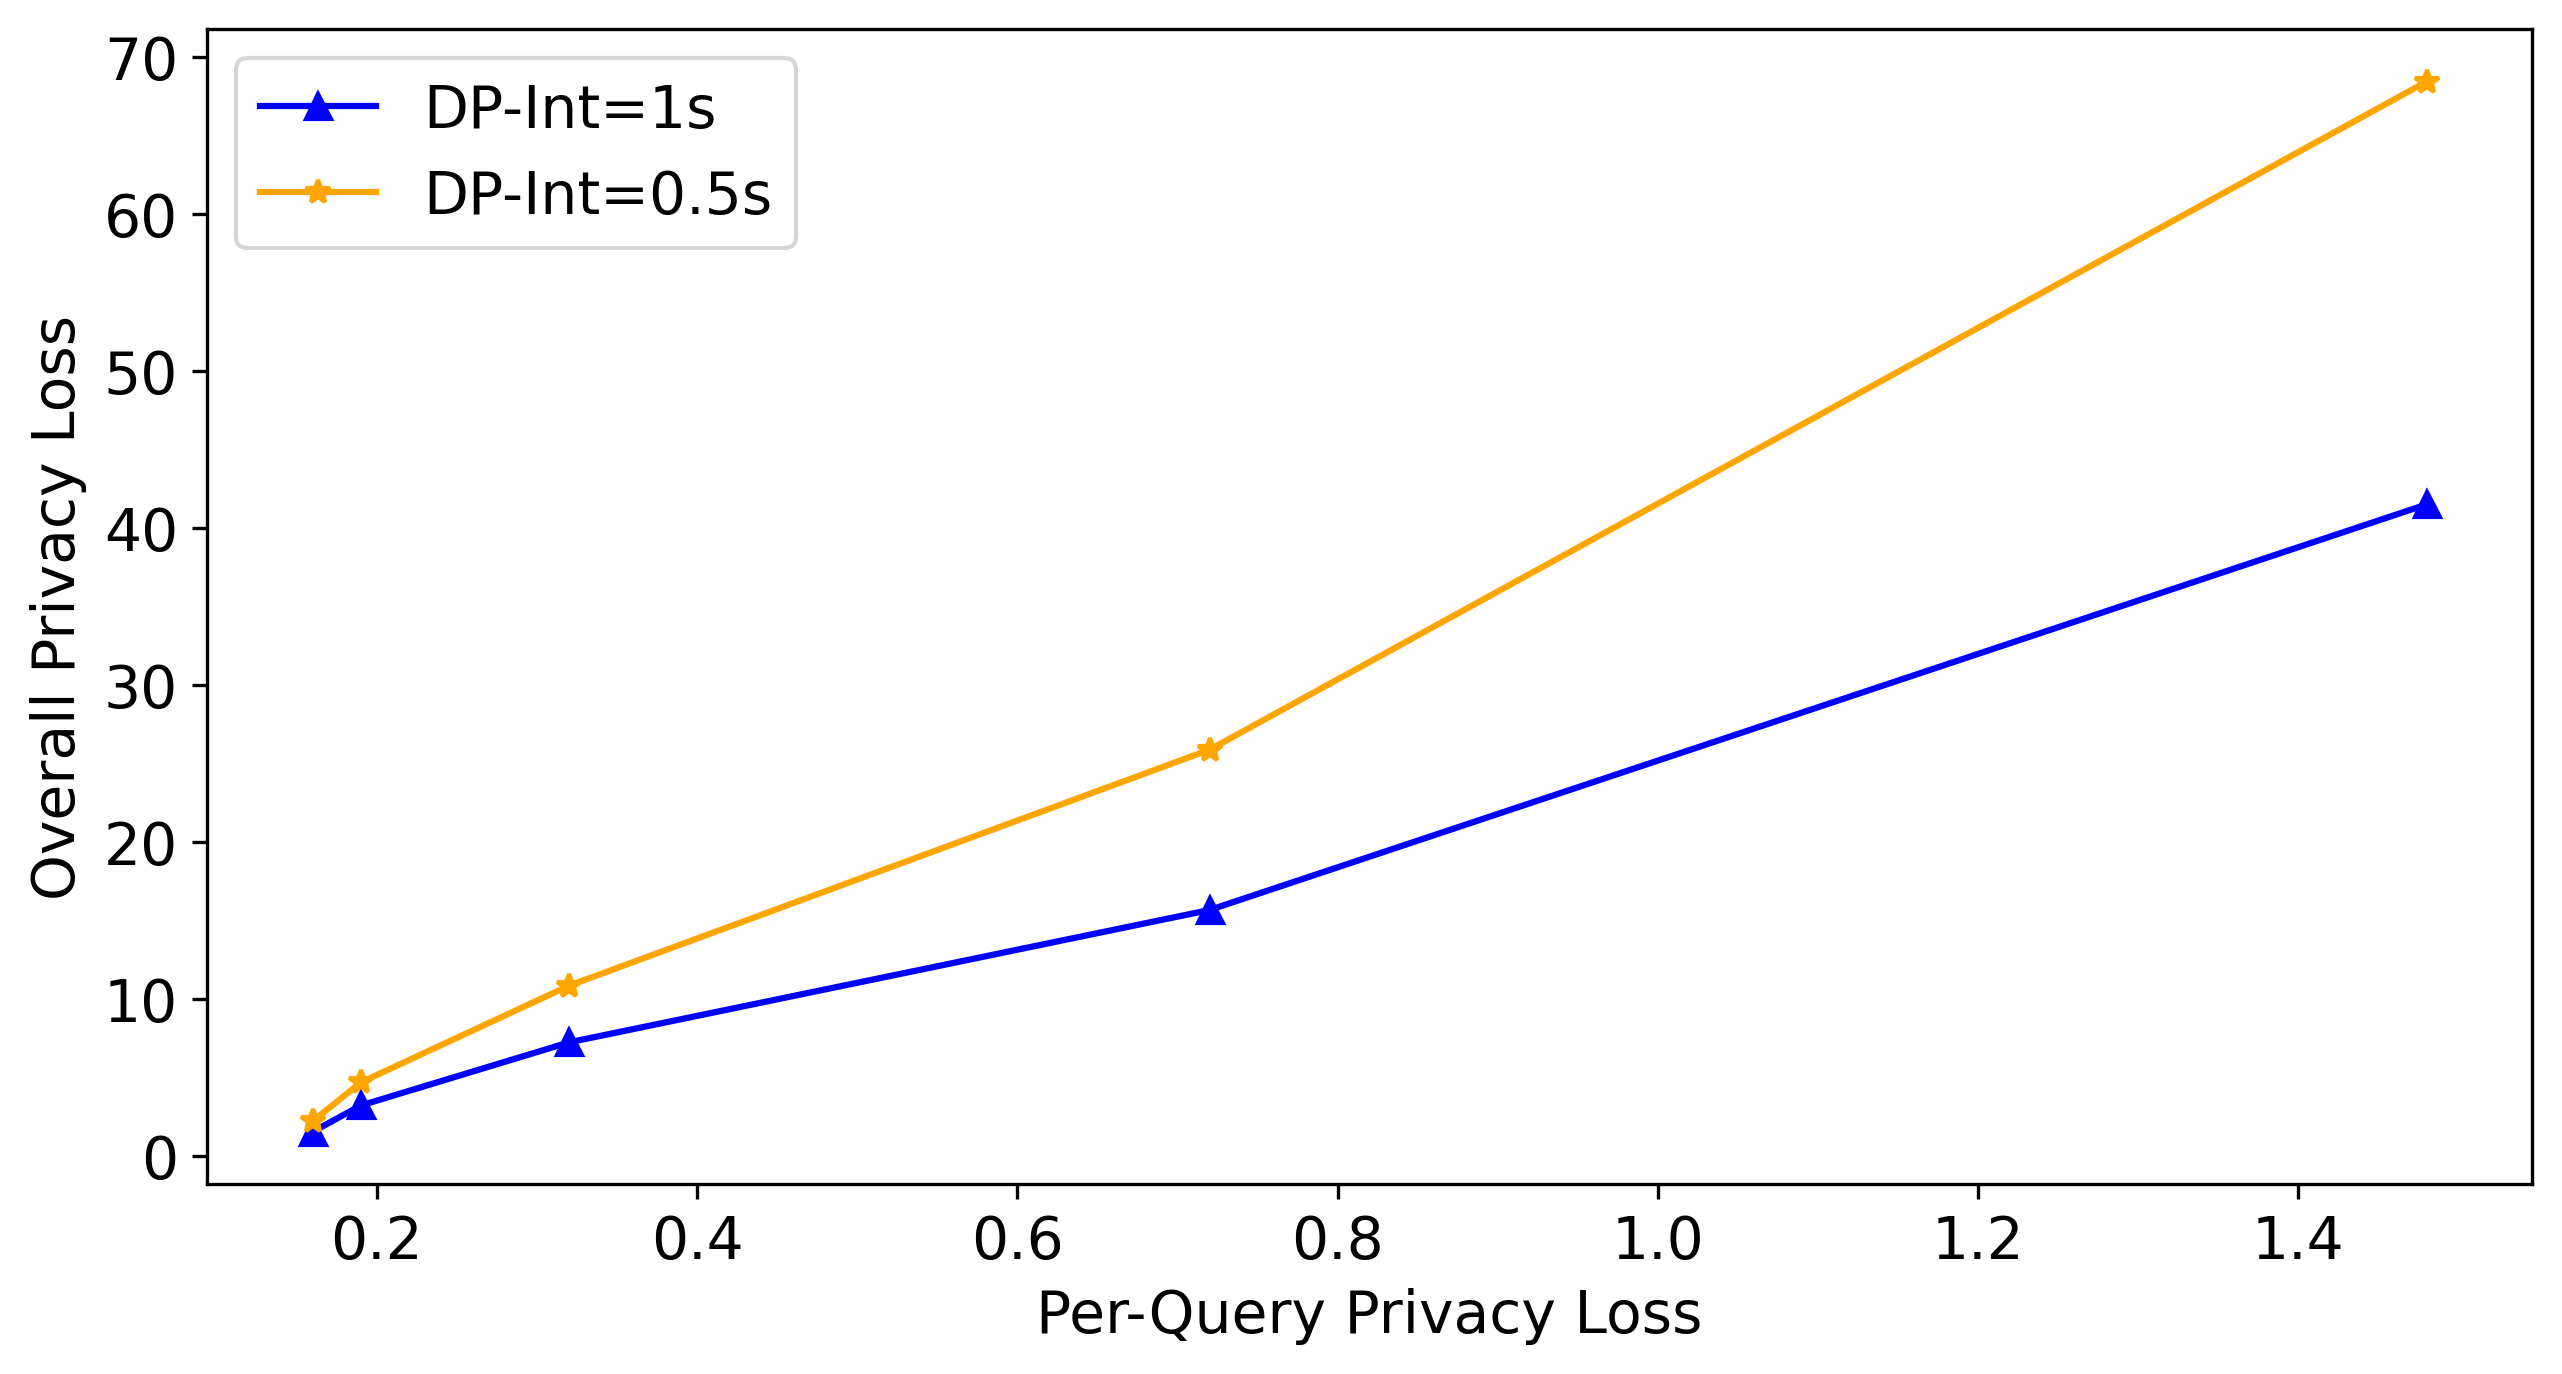

In [5]:
simulator_overheads_1e6 = [2.05, 4.16, 8.16, 17.21, 33.46]
simulator_overheads_5e5 = [4.01, 8.14, 16.29, 32.76, 53.47]
testbed_overheads_1e6 = [2.44, 4.62, 9.22, 18.49, 36.08]
testbed_overheads_5e5 = [4.73, 9.22, 18.2, 36.6, 59.6]
overall_privacy_losses_1e6 = [41.49, 15.66, 7.23, 3.21, 1.54]
overall_privacy_losses_5e5 = [68.42, 25.87, 10.84, 4.68, 2.22]
per_window_privacy_losses = [1.48, 0.72, 0.32, 0.19, 0.16]

plt.rcParams.update({'font.size': 14})


plt.figure(dpi=300, figsize=(10,5))
plt.plot(per_window_privacy_losses, simulator_overheads_1e6, '-^', color='blue', label='Simulator, DP-Int=1s')
plt.plot(per_window_privacy_losses, testbed_overheads_1e6, '-^', color='orange', label='Testbed, DP-Int=1s')

plt.plot(per_window_privacy_losses, simulator_overheads_5e5, '-*', color='blue', label='Simulator, DP-Int=0.5s')
plt.plot(per_window_privacy_losses, testbed_overheads_5e5, '-*', color='orange', label='Simulator, DP-Int=0.5s')
plt.plot([0, 1.5], [0, 0], 'r--', label='Without Shaping')
plt.plot([0, 1.5], [38, 38], 'g--', label='Constant-Rate Shaping')
plt.xlabel('Per-Query Privacy Loss')
plt.ylabel('Aggregated Overhead')
plt.legend(loc='upper right')
plt.savefig('results/overhead_vs_privacy_loss.pdf')




plt.figure(dpi=300, figsize=(10,5))
plt.plot(per_window_privacy_losses, overall_privacy_losses_1e6, '-^', color='blue', label='DP-Int=1s')
plt.plot(per_window_privacy_losses, overall_privacy_losses_5e5, '-*', color='orange', label='DP-Int=0.5s')
plt.xlabel('Per-Query Privacy Loss')
plt.ylabel('Overall Privacy Loss')
plt.legend()
plt.savefig('results/overall_privacy_loss_vs_privacy_loss.pdf')
plt.show()




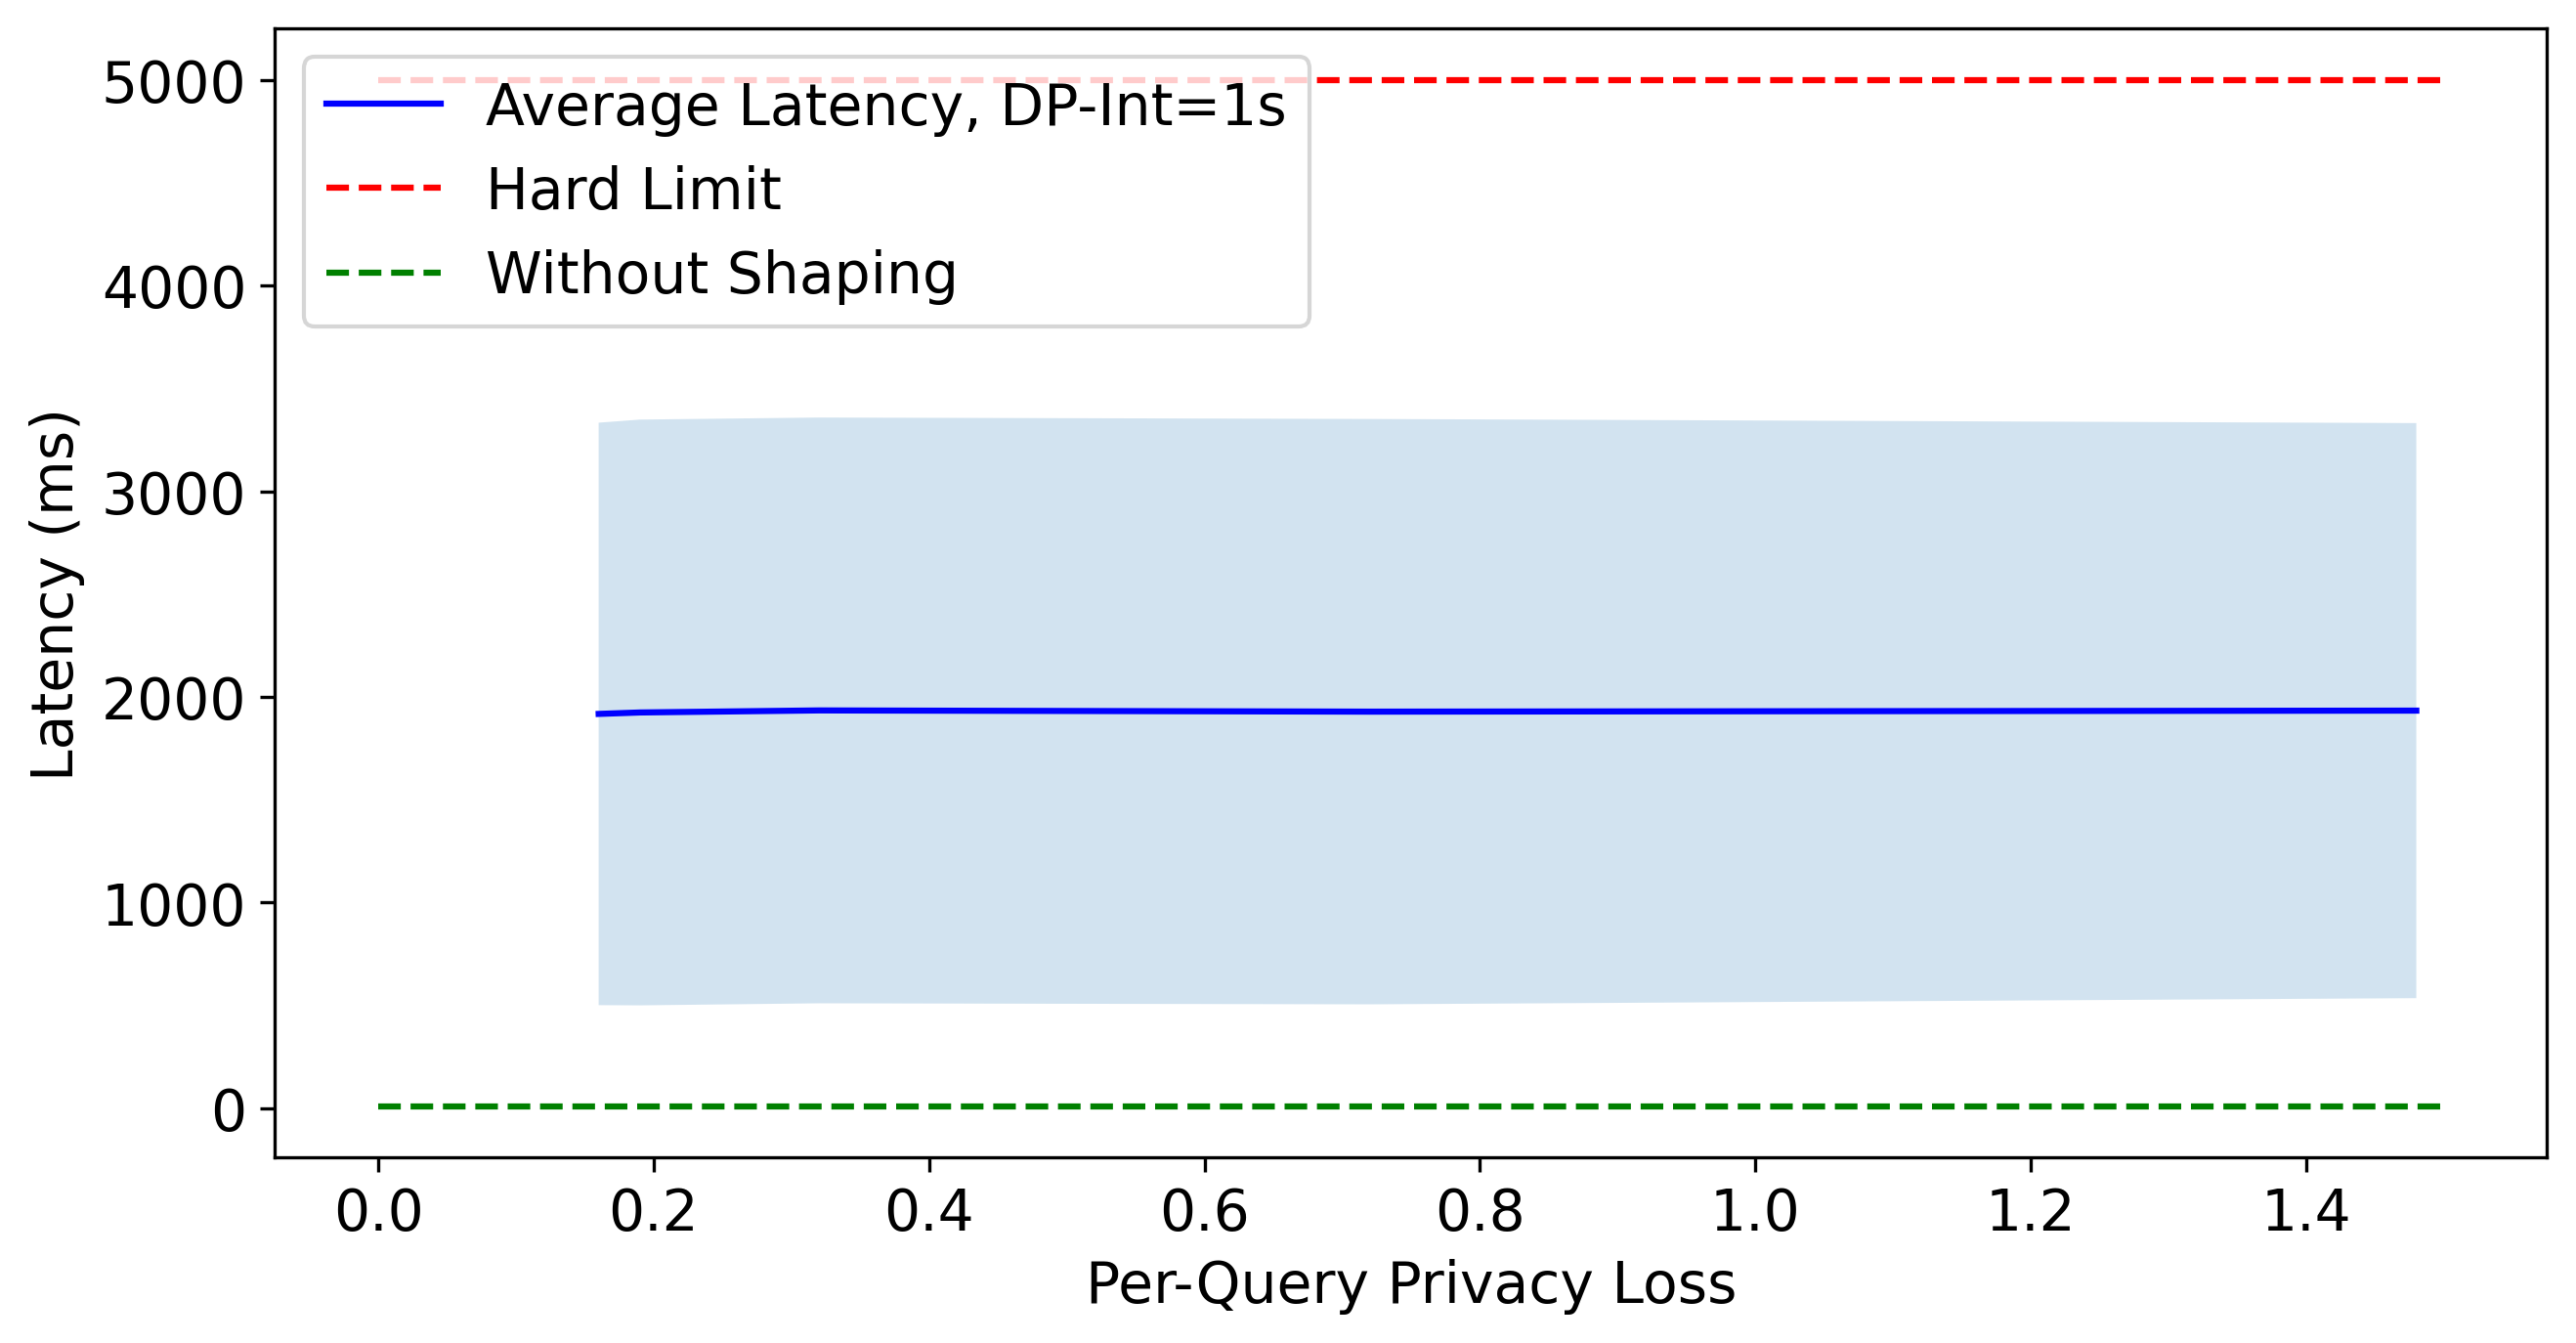

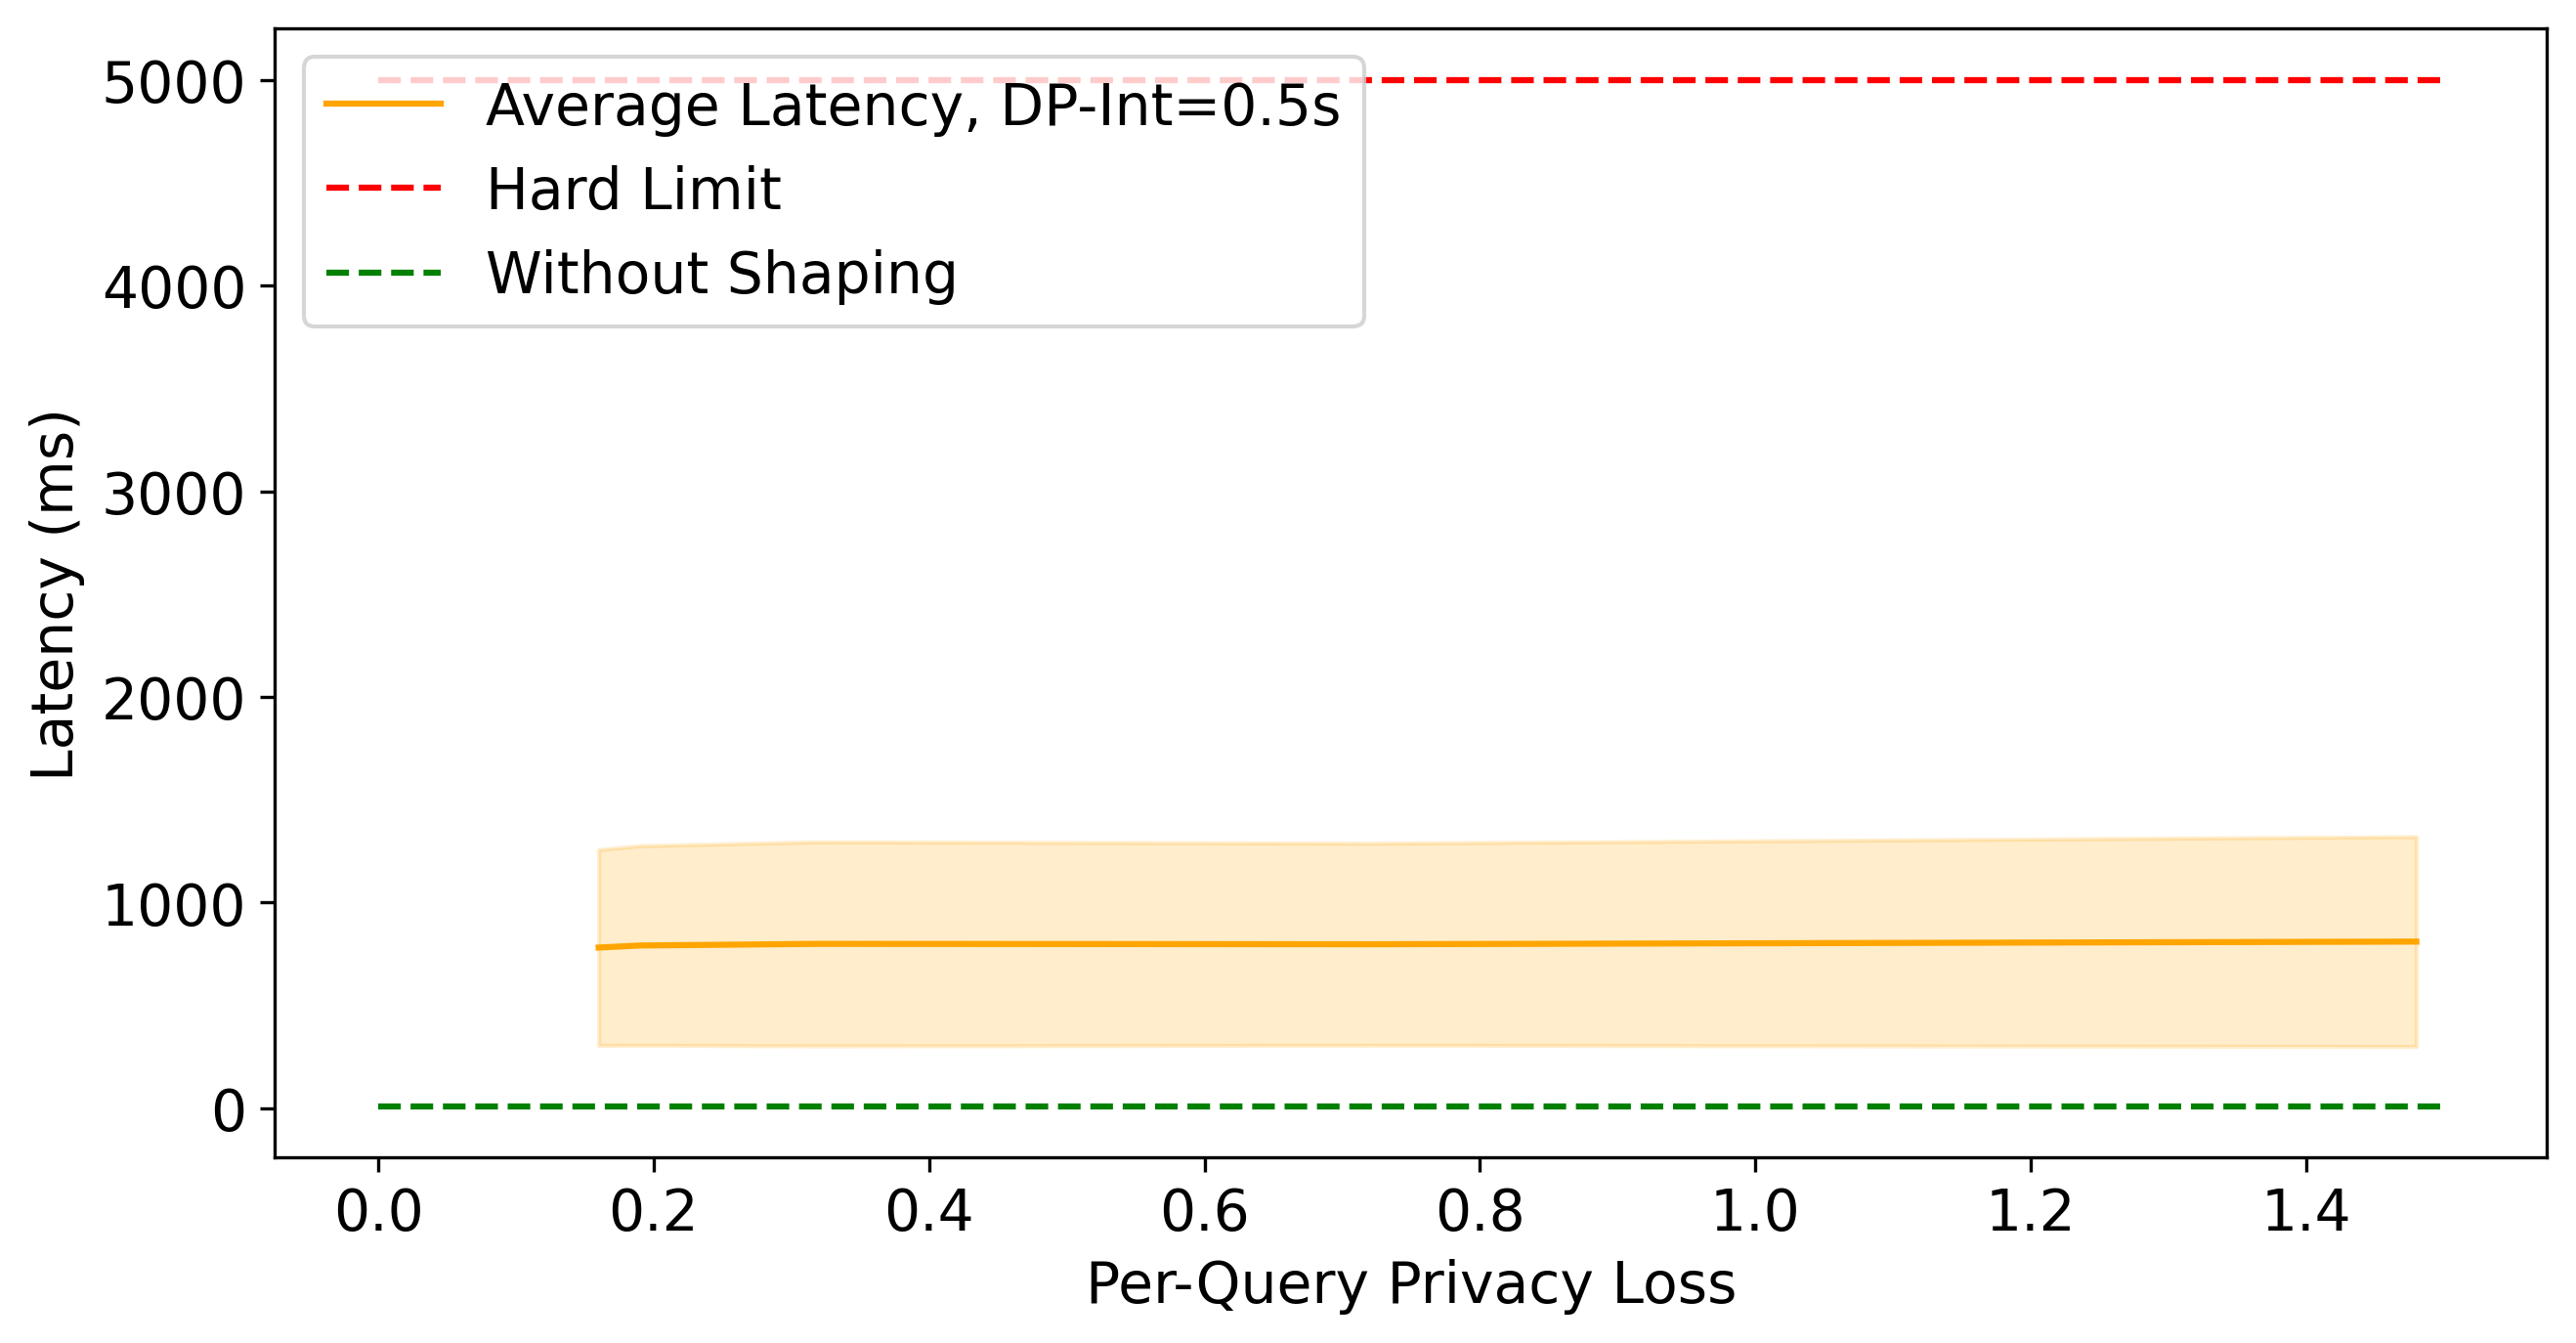

In [9]:
average_latency_1e6 = np.array([1933, 1928, 1934, 1924, 1917])
std_latency_1e6 = np.array([1398, 1423, 1424, 1424, 1416])
average_latency_5e5 =  np.array([810, 797, 799, 791 ,781])
std_latency_5e5 = np.array([510, 491, 496, 485, 476])
per_window_privacy_losses = [1.48, 0.72, 0.32, 0.19, 0.16]
# fig, ax = plt.subplots(dpi=300, figsize=(10, 5))

# ax.plot(privacy_loss, TCN_avg_acc,label='BandB_avg')
# ax.fill_between(privacy_loss, TCN_avg_acc - TCN_std_acc, TCN_avg_acc + TCN_std_acc, alpha=0.2)
# ax.set_xlabel("Privacy Loss")
# ax.set_ylabel("Attacker Test Accuracy")
# ax.set_title("TCN model")

fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
ax.plot(per_window_privacy_losses, average_latency_1e6, color='blue', label='Average Latency, DP-Int=1s')


ax.fill_between(per_window_privacy_losses, average_latency_1e6 - std_latency_1e6, average_latency_1e6 + std_latency_1e6, alpha=0.2)
plt.plot([0, 1.5], [5000, 5000], 'r--', label='Hard Limit')
plt.plot([0, 1.5], [10, 10], 'g--', label='Without Shaping')
ax.set_xlabel("Per-Query Privacy Loss")
ax.set_ylabel("Latency (ms)")
ax.legend(loc='upper left')
plt.savefig('results/latency_vs_privacy_loss_1e6.pdf')

fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
ax.plot(per_window_privacy_losses, average_latency_5e5, color='orange', label='Average Latency, DP-Int=0.5s')
ax.fill_between(per_window_privacy_losses, average_latency_5e5 - std_latency_5e5, average_latency_5e5 + std_latency_5e5, color='orange', alpha=0.2)
plt.plot([0, 1.5], [5000, 5000], 'r--', label='Hard Limit')
plt.plot([0, 1.5], [10, 10], 'g--', label='Without Shaping')
ax.set_xlabel("Per-Query Privacy Loss")
ax.set_ylabel("Latency (ms)")
# add legend in upper left corner
ax.legend(loc='upper left')
plt.savefig('results/latency_vs_privacy_loss_5e5.pdf')


## Number of videos VS overhead

{'aggregated_privacy_loss': [2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.4695768073704025, 2.469576807

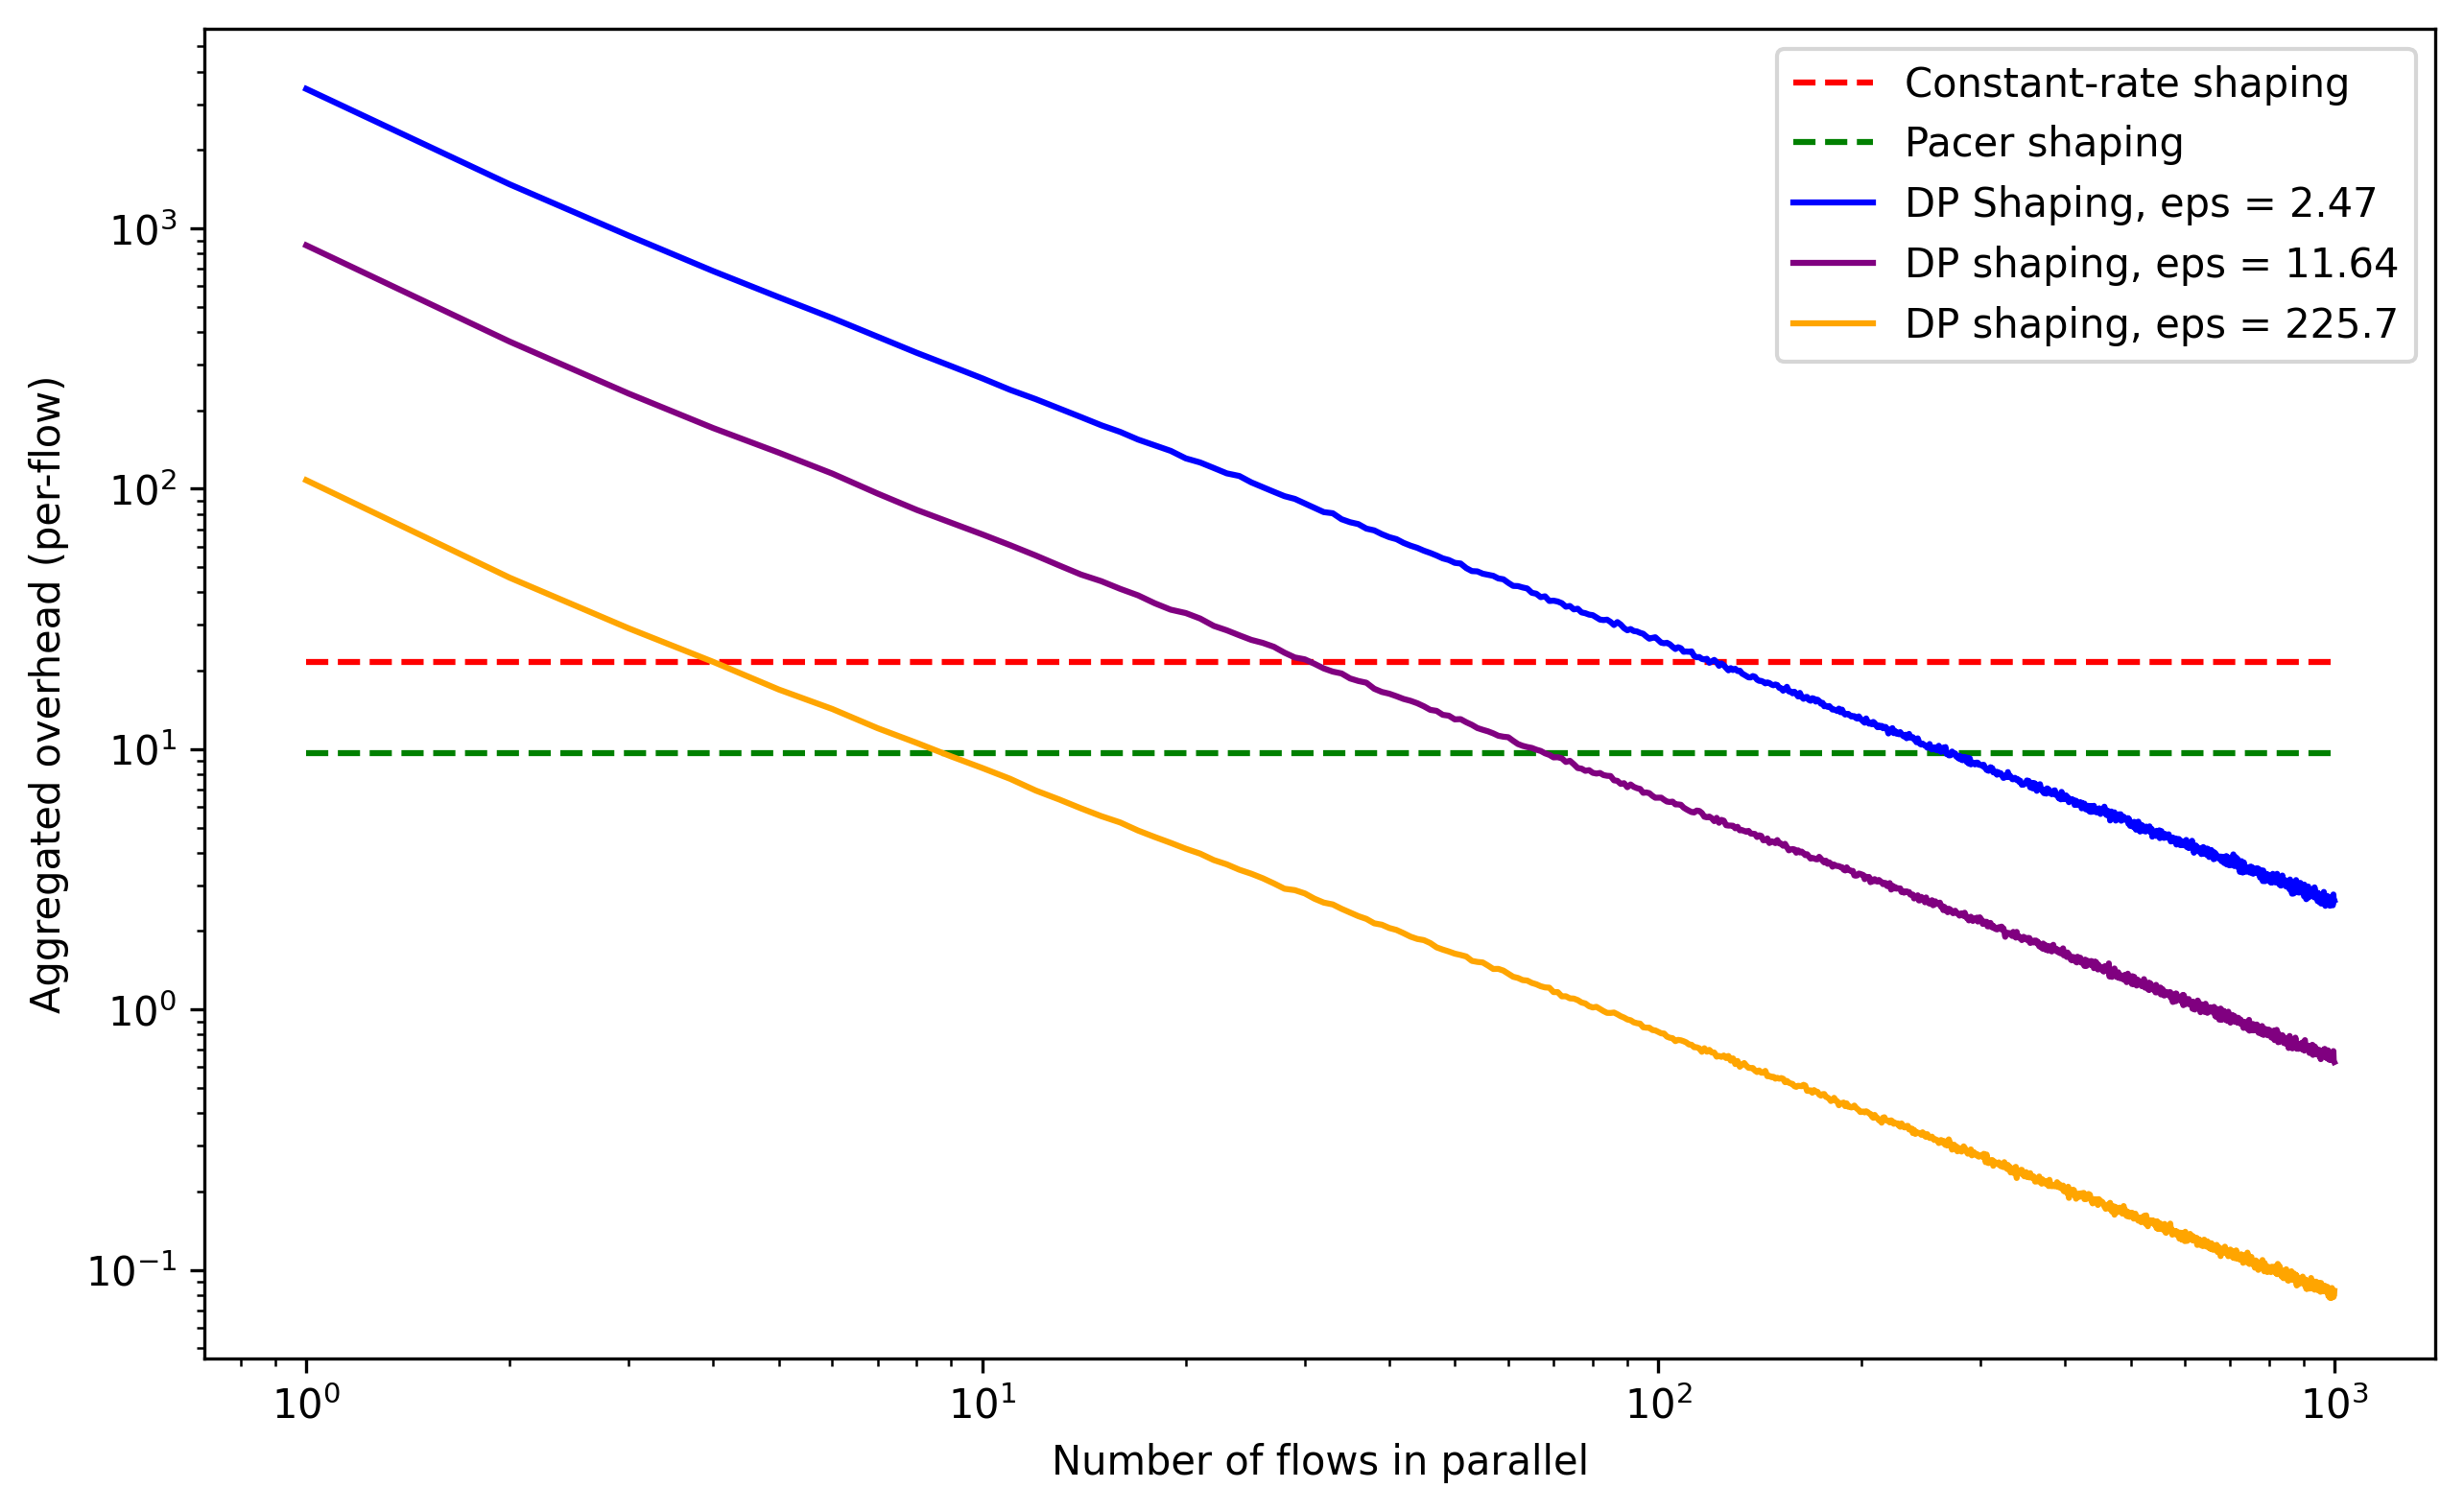

In [38]:


results_dir = "/home/ubuntu/results/number_of_traces_vs_overhead_(2023-04-27_22-15)/results.pkl"

baseline_results_dir = "/home/ubuntu/results/number_of_traces_vs_overhead_(2023-04-27_22-15)/baseline_results.pkl"

results = pickle.load(open(results_dir, 'rb'))
baseline_results = pickle.load(open(baseline_results_dir, 'rb'))
print(results)
print(baseline_results)
aggregated_overhead = results['average_aggregated_overhead']
number_of_videos = results['video_num']
aggregated_overhead_constant_rate = baseline_results['average_aggregated_overhead_constant_rate'][0]
aggregated_overhead_pacer = baseline_results['average_aggregated_overhead_pacer'][0]

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

ax.loglog([np.min(number_of_videos), np.max(number_of_videos)], [aggregated_overhead_constant_rate, aggregated_overhead_constant_rate], 'r--', label='Constant-rate shaping')
ax.loglog([np.min(number_of_videos), np.max(number_of_videos)], [aggregated_overhead_pacer, aggregated_overhead_pacer], 'g--', label='Pacer shaping')

# Set axis labels and legend


eps = round(results['aggregated_privacy_loss'][0], 2)
ax.loglog(number_of_videos, aggregated_overhead, '-', color='blue', label=f'DP Shaping, eps = {eps}')

results_dir = "/home/ubuntu/results/number_of_traces_vs_overhead_(2023-04-27_20-37)/results.pkl"
results = pickle.load(open(results_dir, 'rb'))
aggregated_overhead = results['average_aggregated_overhead']
eps = round(results['aggregated_privacy_loss'][0], 2)
ax.loglog(number_of_videos, aggregated_overhead, '-', color='purple', label=f'DP shaping, eps = {eps}')

print(aggregated_overhead[148], number_of_videos[148])


results_dir = "/home/ubuntu/results/number_of_traces_vs_overhead_(2023-04-27_22-00)/results.pkl"
results = pickle.load(open(results_dir, 'rb'))
aggregated_overhead = results['average_aggregated_overhead']
eps = round(results['aggregated_privacy_loss'][0], 2)
ax.loglog(number_of_videos, aggregated_overhead, '-', color='orange', label=f'DP shaping, eps = {eps}')





ax.set_xlabel('Number of flows in parallel')
ax.set_ylabel('Aggregated overhead (per-flow)')
ax.legend()
# Show the plot
plt.show()